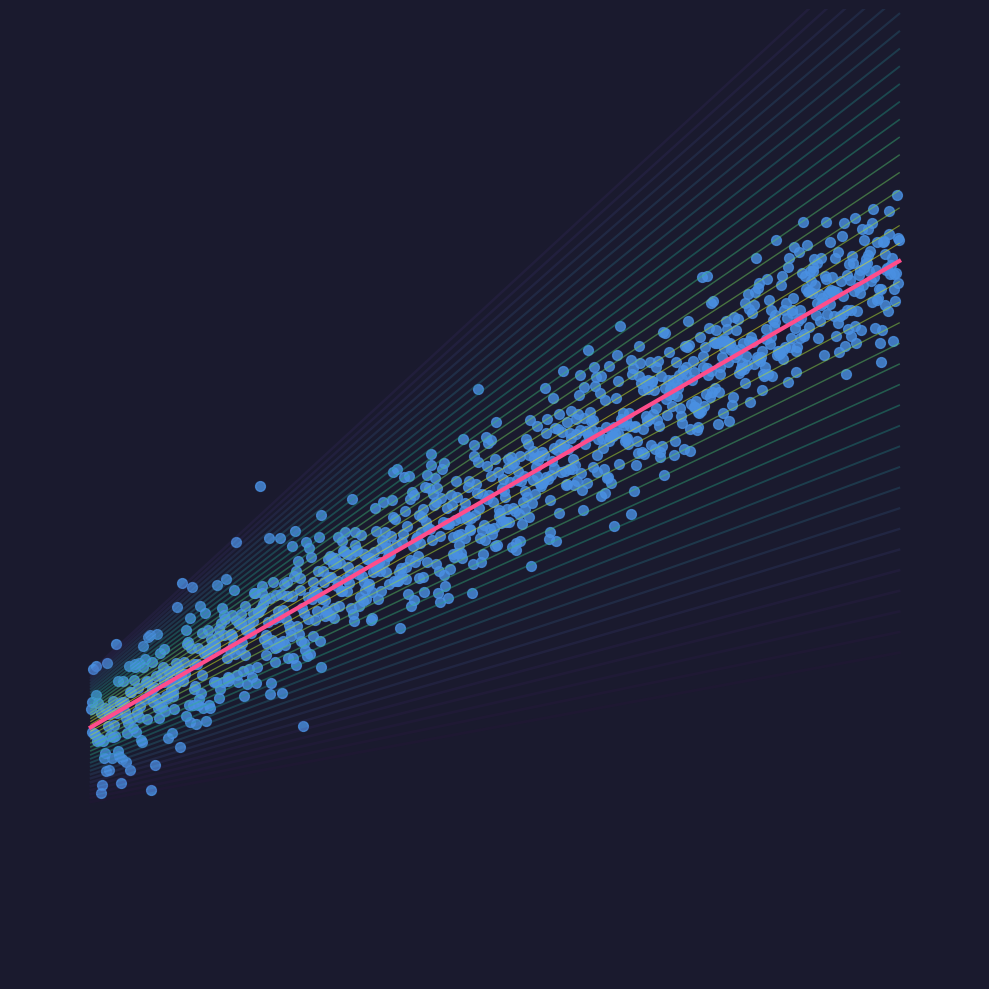

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Generate Synthetic Data ---
# True parameters for the underlying linear relationship
true_m = 2.5
true_b = 5

# Generate x values
np.random.seed(42) # for reproducibility
X = np.linspace(0, 10, 1000) # 50 points from 0 to 10

# Generate y values with some random noise
noise = np.random.normal(0, 2, X.shape) # Gaussian noise
y_true = true_m * X + true_b
y = y_true + noise

# --- 2. Simulate Linear Regression Optimization ---

# Define the number of steps for lines from each direction
num_steps_per_side = 20 # Increased for a smoother gradient and more lines

# --- Parameters starting ABOVE the true line ---
initial_m_above = 4.0   # Significantly higher slope
initial_b_above = 8.0   # Significantly higher intercept

slopes_above = np.linspace(initial_m_above, true_m, num_steps_per_side)
intercepts_above = np.linspace(initial_b_above, true_b, num_steps_per_side)

# --- Parameters starting BELOW the true line ---
initial_m_below = 0.8   # Significantly lower slope
initial_b_below = 1.0   # Significantly lower intercept

slopes_below = np.linspace(initial_m_below, true_m, num_steps_per_side)
intercepts_below = np.linspace(initial_b_below, true_b, num_steps_per_side)

# Combine all generated slopes and intercepts
all_slopes = np.concatenate((slopes_above, slopes_below))
all_intercepts = np.concatenate((intercepts_above, intercepts_below))

# --- Calculate distance and sort lines ---
line_data = []
for m, b in zip(all_slopes, all_intercepts):
    # A simple distance metric: sum of absolute differences in m and b
    distance = np.abs(m - true_m) + np.abs(b - true_b)
    line_data.append({'m': m, 'b': b, 'distance': distance})

# Sort lines by their distance to the true line (closest last)
line_data.sort(key=lambda x: x['distance'])

total_lines = len(line_data)

# --- 3. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points
ax.scatter(X, y, color='#4A90E2', s=50, alpha=0.8, zorder=0) # Bright blue dots

# Choose a colormap that goes from dark to bright (e.g., viridis, plasma, or magma_r reversed)
# We want darker colors for lines far away, and brighter/warmer colors for lines close.
# `viridis_r` goes from yellow (bright) to dark blue/purple.
# If we iterate `i` from 0 to `total_lines-1` (which means closest lines have highest `i`),
# then `viridis_r(i / total_lines)` will correctly map to brighter colors for closest lines.
cmap = plt.cm.viridis_r


# Plot the iterative regression lines (now sorted by distance)
for i, line_info in enumerate(line_data):
    current_m = line_info['m']
    current_b = line_info['b']

    y_pred = current_m * X + current_b

    # Line properties: further lines are more transparent and darker
    # Alpha: increase from 0.1 to 0.7 as lines get closer (i.e., as 'i' increases)
    alpha_max_for_far = 0.6 # Max opacity for lines furthest away
    alpha_min_for_close = 0.1 # Min opacity for lines closest to the optimal
    alpha = alpha_max_for_far - (i / (total_lines - 1)) * (alpha_max_for_far - alpha_min_for_close)
    
    # Line width: slightly increase as lines get closer
    lw = 0.7 + (i / total_lines) * 1.3
    
    # Color from colormap: darker for smaller 'i' (further lines), brighter for larger 'i' (closer lines)
    line_color = cmap(i / total_lines)
    
    ax.plot(X, y_pred, color=line_color, linewidth=lw, alpha=alpha, zorder=1)

# Plot the final, "optimized" (true) regression line prominently (main red line)
ax.plot(X, true_m * X + true_b, color='#FF4D8B', linewidth=3, linestyle='-', zorder=2)


# --- 4. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust x and y limits to ensure all lines and data points are visible
ax.set_xlim(X.min() - 1, X.max() + 1)
ax.set_ylim(y.min() - 10, y.max() + 10) # Expanded y-range to show convergence from far
ax.set_aspect('auto', adjustable='box')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

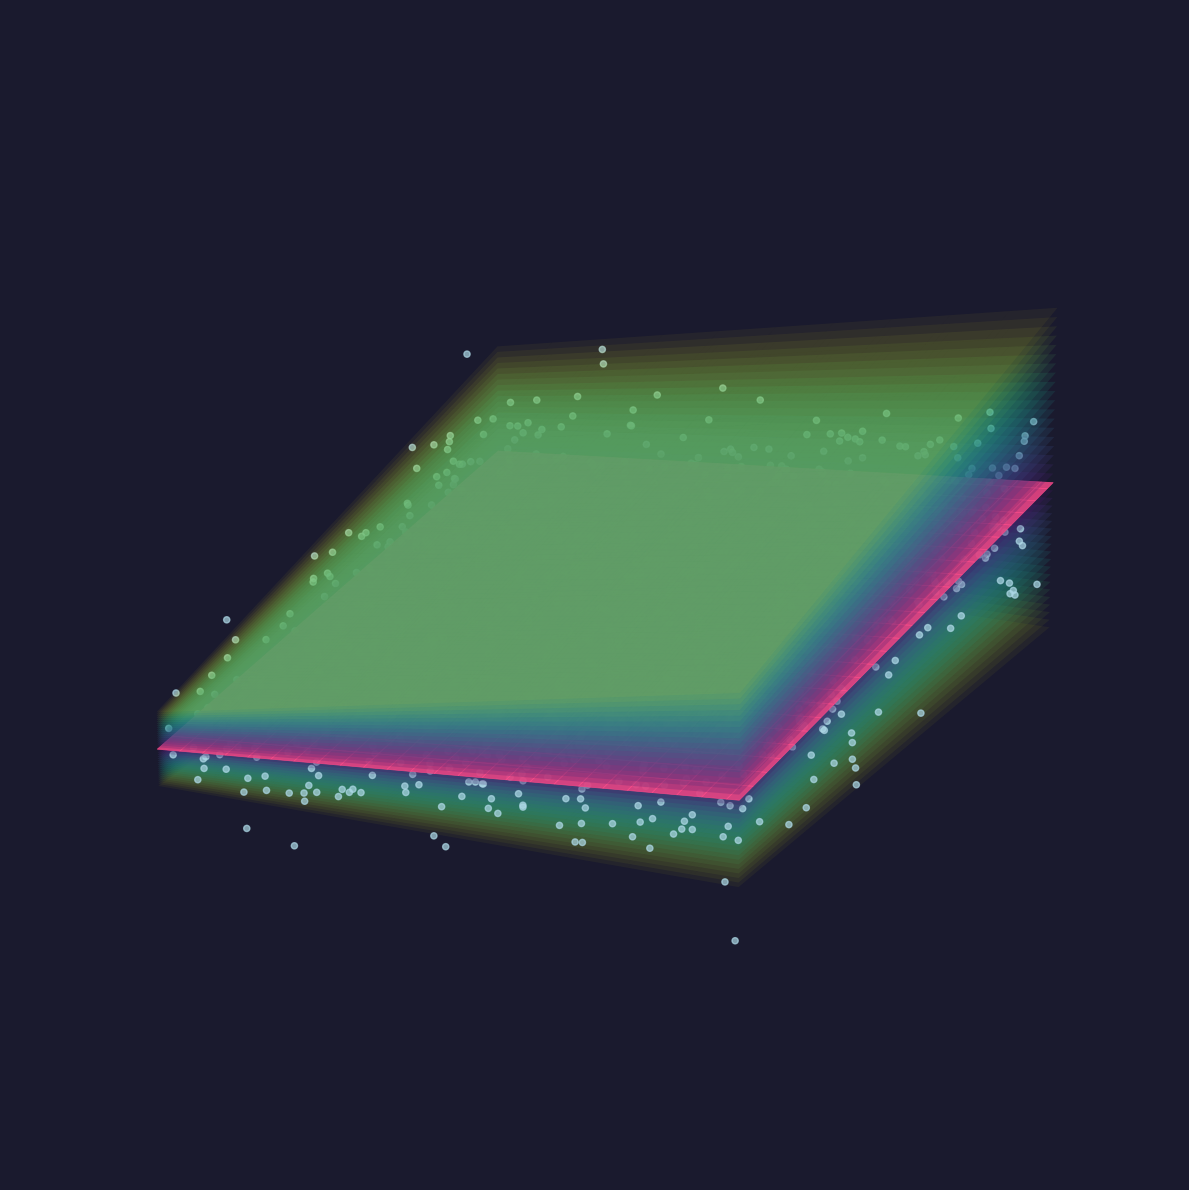

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Generate Synthetic Data for Multiple Linear Regression ---
# True coefficients for the underlying relationship: y = b0 + b1*X1 + b2*X2
true_b0 = 1.0  # Intercept
true_b1 = 0.8  # Coefficient for X1
true_b2 = 1.2  # Coefficient for X2 (adjusted for better 3D visualization)

np.random.seed(42) # for reproducibility

# Generate X1 and X2 values
X1 = np.linspace(0, 10, 50) # For meshgrid
X2 = np.linspace(0, 10, 50) # For meshgrid
# Create a grid of X1 and X2 for the true data points (more points for dense scatter)
X1_data = np.random.uniform(0, 10, 1500)
X2_data = np.random.uniform(0, 10, 1500)

# Generate y values with noise
noise = np.random.normal(0, 5, X1_data.shape) # Increased noise for a more spread-out point cloud
y_true = true_b0 + true_b1 * X1_data + true_b2 * X2_data
y_data = y_true + noise

# --- 2. Simulate Multiple Linear Regression Optimization ---

num_steps_per_side = 20 # Number of candidate planes converging from each side

# --- Initial guesses for coefficients, ranging above and below the true values ---
# These ranges determine how 'far' the initial planes are from the optimal plane.

# Initial coefficients ABOVE the true plane
initial_b0_above = 5.0
initial_b1_above = 1.5
initial_b2_above = 2.0

# Initial coefficients BELOW the true plane
initial_b0_below = -3.0
initial_b1_below = 0.3
initial_b2_below = 0.5

# Create sequences of coefficients converging to their true values
b0_above = np.linspace(initial_b0_above, true_b0, num_steps_per_side)
b1_above = np.linspace(initial_b1_above, true_b1, num_steps_per_side)
b2_above = np.linspace(initial_b2_above, true_b2, num_steps_per_side)

b0_below = np.linspace(initial_b0_below, true_b0, num_steps_per_side)
b1_below = np.linspace(initial_b1_below, true_b1, num_steps_per_side)
b2_below = np.linspace(initial_b2_below, true_b2, num_steps_per_side)

# Combine all generated coefficient sets
all_b0 = np.concatenate((b0_above, b0_below))
all_b1 = np.concatenate((b1_above, b1_below))
all_b2 = np.concatenate((b2_above, b2_below))

# --- Calculate distance to the true model and sort planes ---
plane_data = []
for i in range(len(all_b0)):
    current_b0, current_b1, current_b2 = all_b0[i], all_b1[i], all_b2[i]
    # Distance metric: sum of absolute differences for all coefficients
    distance = np.abs(current_b0 - true_b0) + np.abs(current_b1 - true_b1) + np.abs(current_b2 - true_b2)
    plane_data.append({'b0': current_b0, 'b1': current_b1, 'b2': current_b2, 'distance': distance})

# Sort planes by their distance to the true plane (closest last).
# This means `i=0` will correspond to the *furthest* plane, and `i=total_planes-1` to the *closest* plane.
plane_data.sort(key=lambda x: x['distance'])

total_planes = len(plane_data)

# --- 3. Plotting the Optimization Process in 3D ---

plt.style.use('dark_background')
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Set the background color to match the desired dark aesthetic
background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points (light blue color)
ax.scatter(X1_data, X2_data, y_data, color='#ADD8E6', s=20, alpha=0.7, zorder=3) # Dots in front

# Create a meshgrid for generating the surfaces of the planes
X1_plot, X2_plot = np.meshgrid(X1, X2)

# Choose a colormap where `cmap(0)` is dark and `cmap(1)` is bright for the gradient
cmap = plt.cm.viridis

# Plot the iterative regression planes (now sorted by distance)
for i, plane_info in enumerate(plane_data):
    current_b0 = plane_info['b0']
    current_b1 = plane_info['b1']
    current_b2 = plane_info['b2']

    # Calculate y_pred for the current plane using the meshgrid
    Y_pred_plot = current_b0 + current_b1 * X1_plot + current_b2 * X2_plot

    # Alpha: Furthest planes (small i) are *more opaque*, closer planes (large i) are *more transparent*.
    alpha_max_for_far = 0.25 # Max opacity for planes furthest away (small i)
    alpha_min_for_close = 0.05 # Min opacity for planes closest to the optimal (large i)
    # Linear interpolation for alpha, inversely proportional to distance rank (i)
    alpha = alpha_max_for_far - (i / (total_planes - 1)) * (alpha_max_for_far - alpha_min_for_close)
    
    # Line width: slightly increase as planes get closer (not applicable for surface plot, but kept for consistency)
    lw = 0.7 + (i / (total_planes - 1)) * 1.3
    
    # Color from colormap: Darker for smaller 'i' (furthest planes), brighter for larger 'i' (closest planes)
    rgba_color = cmap(i / (total_planes - 1))
    
    # Plot the surface. `rstride` and `cstride` control density.
    ax.plot_surface(X1_plot, X2_plot, Y_pred_plot, color=rgba_color, alpha=alpha,
                    rstride=5, cstride=5, linewidth=0, antialiased=True, zorder=1)

# Plot the final, "optimized" (true) regression plane prominently (main red plane)
Y_optimal_plot = true_b0 + true_b1 * X1_plot + true_b2 * X2_plot
ax.plot_surface(X1_plot, X2_plot, Y_optimal_plot, color='#FF4D8B', alpha=0.8,
                rstride=2, cstride=2, linewidth=0.5, edgecolor='#FF4D8B', antialiased=True, zorder=2)


# --- 4. Customize the 3D Plot (Remove all Axis elements) ---

# Remove axis labels, ticks.
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Hide the background panes for a cleaner look (fully transparent)
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# Hide the grid lines within the panes (fully transparent)
ax.xaxis._axinfo["grid"]['color'] = (0,0,0,0)
ax.yaxis._axinfo["grid"]['color'] = (0,0,0,0)
ax.zaxis._axinfo["grid"]['color'] = (0,0,0,0)

# CORRECTED LINES: Explicitly set the color of the axis lines to fully transparent
# This is the most reliable way to hide the axis bounding box lines in modern Matplotlib 3D.
ax.xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))


# You might want to adjust the viewing angle for better perspective
ax.view_init(elev=20, azim=-60) # Experiment with these values

plt.tight_layout()
plt.show()

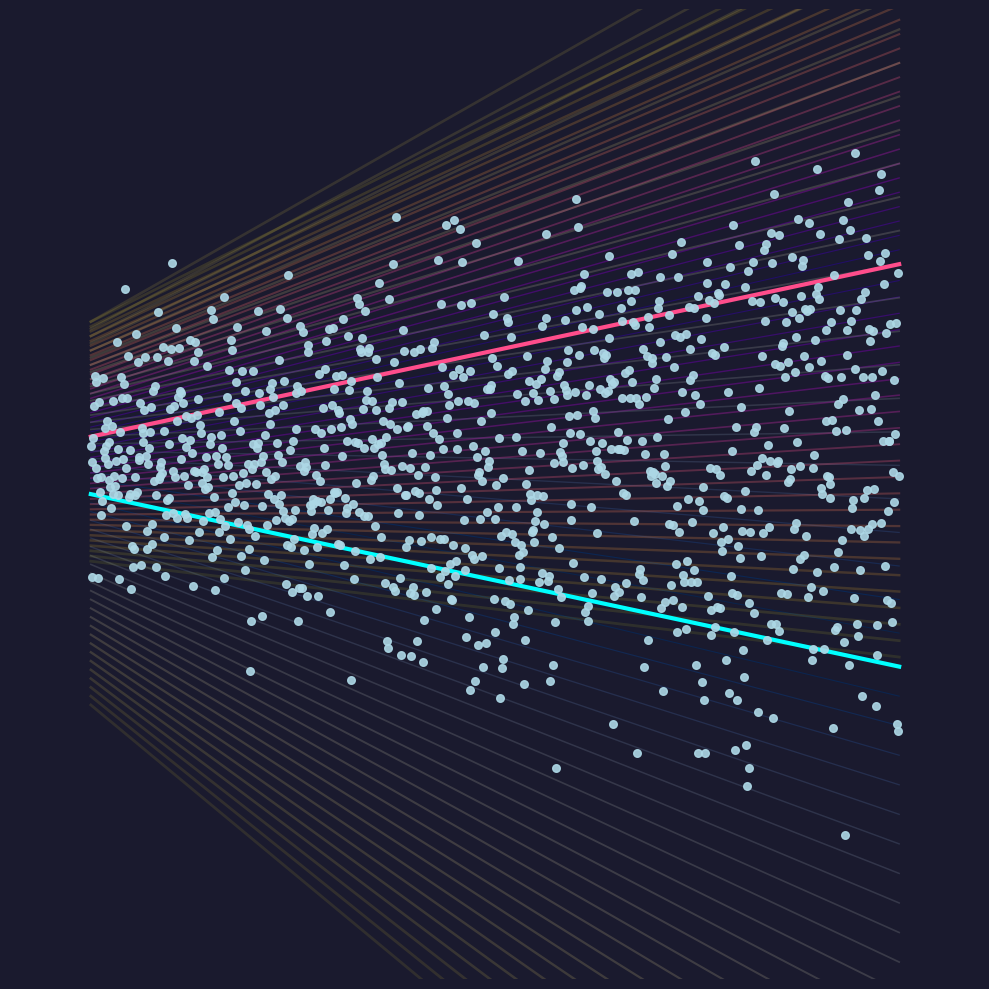

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Generate Synthetic Data for an Interaction Model ---
# True coefficients for the underlying relationship: y = b0 + b1*X1 + b2*X2 + b3*(X1*X2)
true_b0 = 15.0  # Intercept (adjusted to shift the crossing point more centrally)
true_b1 = 3.0   # Base coefficient for X1 (positive)
true_b2 = -1.0  # Coefficient for X2
true_b3 = -0.6  # Interaction coefficient (negative) - CRUCIAL for crossing lines
                # Effective slope for X1 is (true_b1 + true_b3 * X2)

np.random.seed(42) # for reproducibility

# Generate X1 values
X1 = np.linspace(0, 10, 1000) # Many points for a dense plot

# Generate X2 values (our second feature) for scattered data
X2_data_points = np.random.uniform(1, 9, X1.shape) # X2 values across a range

# Generate y values with noise using the interaction formula
noise = np.random.normal(0, 6, X1.shape) # Gaussian noise, adjusted for spread
y_true_data = true_b0 + true_b1 * X1 + true_b2 * X2_data_points + true_b3 * (X1 * X2_data_points)
y_data = y_true_data + noise

# --- 2. Define two specific X2 values to show the interaction ---
# These are the two constant X2 values for which we will plot the regression lines.
X2_level1 = 2.0  # A lower constant value for X2
X2_level2 = 8.0 # A higher constant value for X2

# Verify effective slopes:
# Effective slope for X2_level1: (true_b1 + true_b3 * X2_level1) = (3.0 + (-0.6 * 2.0)) = 3.0 - 1.2 = 1.8 (Positive)
# Effective slope for X2_level2: (true_b1 + true_b3 * X2_level2) = (3.0 + (-0.6 * 8.0)) = 3.0 - 4.8 = -1.8 (Negative)
# This setup guarantees clear crossing lines.

# --- 3. Simulate Optimization for Interaction Model ---

num_steps_per_side = 25 # Number of candidate models converging from each side

# --- Initial guesses for coefficients, ranging above and below the true values ---
# These ranges determine how 'far' the initial lines/surfaces are from the optimal.

# Initial coefficients (tuned to broadly converge to the true parameters)
initial_b0_above = 25.0
initial_b1_above = 4.0
initial_b2_above = 0.0
initial_b3_above = 0.1

initial_b0_below = 5.0
initial_b1_below = 1.0
initial_b2_below = -2.5
initial_b3_below = -1.0

# Create sequences of coefficients converging to their true values
b0_above = np.linspace(initial_b0_above, true_b0, num_steps_per_side)
b1_above = np.linspace(initial_b1_above, true_b1, num_steps_per_side)
b2_above = np.linspace(initial_b2_above, true_b2, num_steps_per_side)
b3_above = np.linspace(initial_b3_above, true_b3, num_steps_per_side)

b0_below = np.linspace(initial_b0_below, true_b0, num_steps_per_side)
b1_below = np.linspace(initial_b1_below, true_b1, num_steps_per_side)
b2_below = np.linspace(initial_b2_below, true_b2, num_steps_per_side)
b3_below = np.linspace(initial_b3_below, true_b3, num_steps_per_side)

# Combine all generated coefficient sets
all_b0 = np.concatenate((b0_above, b0_below))
all_b1 = np.concatenate((b1_above, b1_below))
all_b2 = np.concatenate((b2_above, b2_below))
all_b3 = np.concatenate((b3_above, b3_below))

# --- Calculate distance to the true model and sort candidate models ---
model_data = [] # Stores {b0, b1, b2, b3, distance} for each candidate model
for i in range(len(all_b0)):
    current_b0, current_b1, current_b2, current_b3 = all_b0[i], all_b1[i], all_b2[i], all_b3[i]
    # Distance metric: sum of absolute differences for all coefficients
    distance = np.abs(current_b0 - true_b0) + np.abs(current_b1 - true_b1) + \
               np.abs(current_b2 - true_b2) + np.abs(current_b3 - true_b3)
    model_data.append({'b0': current_b0, 'b1': current_b1, 'b2': current_b2, 'b3': current_b3, 'distance': distance})

# Sort models by their distance to the true model (closest last).
# This means `i=0` will correspond to the *furthest* model, and `i=total_models-1` to the *closest* model.
model_data.sort(key=lambda x: x['distance'])

total_models = len(model_data)

# --- 4. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points
ax.scatter(X1, y_data, color='#ADD8E6', s=30, alpha=0.9, zorder=3) # Light blue dots, in front

# Choose two distinct colormaps for the two sets of lines
cmap1 = plt.cm.plasma # From dark purple to yellow (for X2_level1)
cmap2 = plt.cm.cividis # From dark blue/green to yellow (for X2_level2)


# Plot the iterative regression lines (two lines per model, sorted by model distance)
for i, model_info in enumerate(model_data):
    current_b0 = model_info['b0']
    current_b1 = model_info['b1']
    current_b2 = model_info['b2']
    current_b3 = model_info['b3']

    # Alpha: Furthest models (small i) are *more opaque*, closer models (large i) are *more transparent*.
    alpha_max_for_far = 0.6 # Max opacity for models furthest away (small i)
    alpha_min_for_close = 0.1 # Min opacity for models closest to the optimal (large i)
    # Linear interpolation for alpha, inversely proportional to distance rank (i)
    alpha = alpha_max_for_far - (i / (total_models - 1)) * (alpha_max_for_far - alpha_min_for_close)
    
    # Line width: slightly increase as models get closer
    lw = 0.7 + (i / (total_models - 1)) * 1.3
    
    # Calculate y_pred for X2_level1 using the current model coefficients
    y_pred_level1 = current_b0 + current_b1 * X1 + current_b2 * X2_level1 + current_b3 * (X1 * X2_level1)
    # Plot with color from cmap1
    ax.plot(X1, y_pred_level1, color=cmap1(i / (total_models - 1)), linewidth=lw, alpha=alpha, zorder=1)

    # Calculate y_pred for X2_level2 using the current model coefficients
    y_pred_level2 = current_b0 + current_b1 * X1 + current_b2 * X2_level2 + current_b3 * (X1 * X2_level2)
    # Plot with color from cmap2
    ax.plot(X1, y_pred_level2, color=cmap2(i / (total_models - 1)), linewidth=lw, alpha=alpha, zorder=1)


# --- Plot the final, "optimized" (true) regression lines prominently (red/pink colors) ---
y_optimal_level1 = true_b0 + true_b1 * X1 + true_b2 * X2_level1 + true_b3 * (X1 * X2_level1)
y_optimal_level2 = true_b0 + true_b1 * X1 + true_b2 * X2_level2 + true_b3 * (X1 * X2_level2)

# Use distinct, prominent colors for the final lines to stand out
optimal_line1_color = '#FF4D8B' # Red/Pink (for X2_level1)
optimal_line2_color = '#00FFFF' # Cyan (for X2_level2) - chosen for contrast with plasma/cividis

ax.plot(X1, y_optimal_level1, color=optimal_line1_color, linewidth=3, linestyle='-', zorder=2)
ax.plot(X1, y_optimal_level2, color=optimal_line2_color, linewidth=3, linestyle='-', zorder=2)


# --- 5. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust x and y limits to ensure all lines and data points are visible
ax.set_xlim(X1.min() - 1, X1.max() + 1)
# Adjust y-limits based on the expected range of crossing lines
ax.set_ylim(min(y_data.min(), y_optimal_level1.min(), y_optimal_level2.min()) - 15,
            max(y_data.max(), y_optimal_level1.max(), y_optimal_level2.max()) + 15)
ax.set_aspect('auto', adjustable='box')

# Remove axis ticks, labels, and spines
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False) # Ensure no grid is displayed

plt.tight_layout()
plt.show()

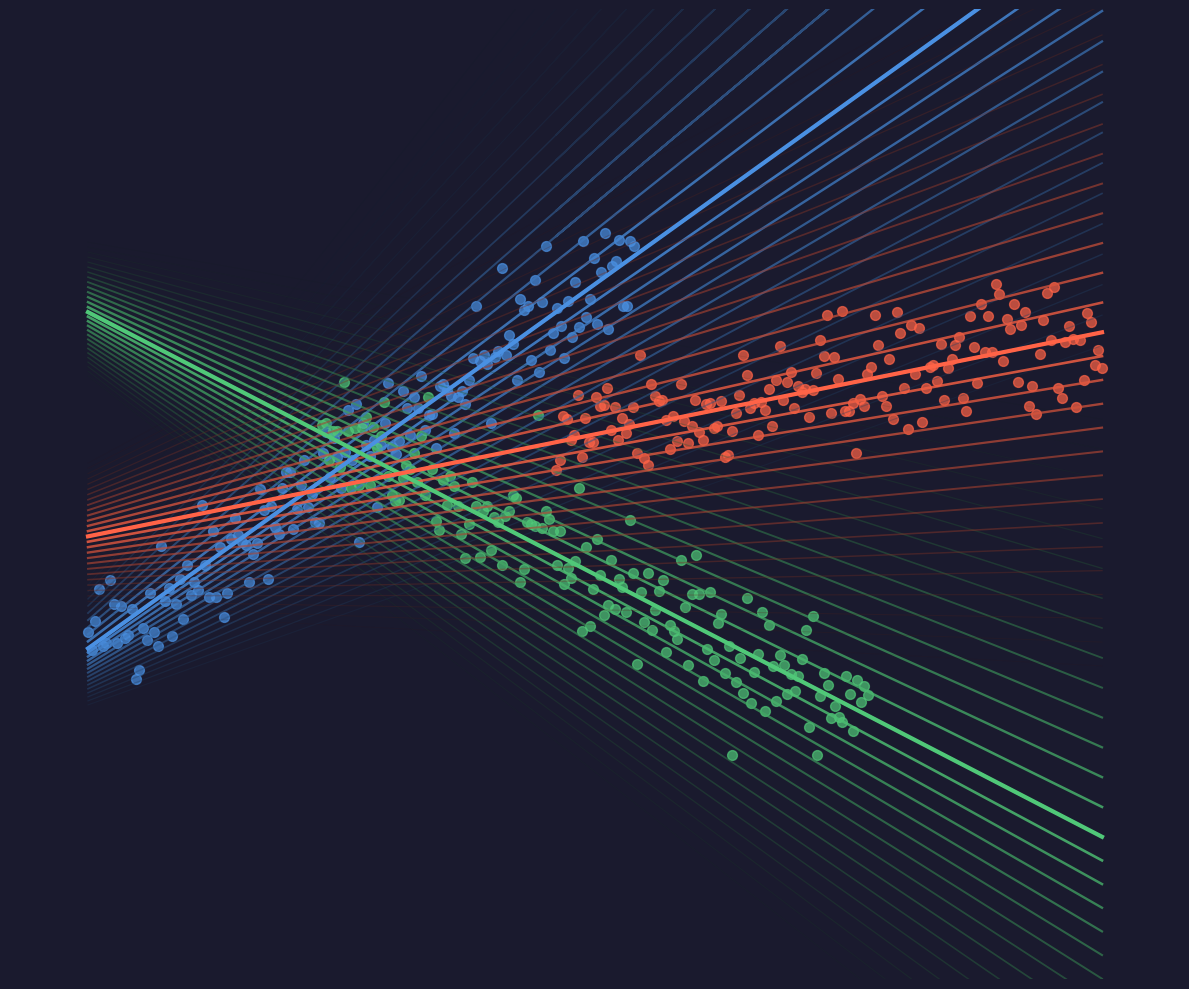

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# --- 1. Generate Synthetic Categorical Data ---
np.random.seed(42)  # for reproducibility

num_categories = 3
categories = ['A', 'B', 'C']

# Define distinct base colors for each category
category_colors_hex = {
    'A': '#4A90E2', # Bright Blue
    'B': '#50C878', # Emerald Green
    'C': '#FF6347'  # Tomato Red
}
# Convert hex colors to RGB tuples for easier manipulation
category_colors_rgb = {k: mcolors.to_rgb(v) for k, v in category_colors_hex.items()}

# True parameters (slope and intercept) for the underlying linear relationship of each category
true_params = {
    'A': {'m': 2.5, 'b': 5},
    'B': {'m': -1.8, 'b': 20},
    'C': {'m': 0.7, 'b': 10}
}

# Lists to store all data points and their categories
X_data_all = []
y_data_all = []
category_labels_all = []

# Generate data for each category
for cat in categories:
    true_m = true_params[cat]['m']
    true_b = true_params[cat]['b']

    # Generate x values, giving each category a slightly different range for visual separation
    x_cat = np.linspace(
        (categories.index(cat) * 3),          # Start x value
        (categories.index(cat) * 3) + 7,      # End x value
        150                                   # Number of points
    )
    
    noise = np.random.normal(0, 1.5, x_cat.shape) # Gaussian noise for y values
    y_true_cat = true_m * x_cat + true_b
    y_cat = y_true_cat + noise

    X_data_all.extend(x_cat)
    y_data_all.extend(y_cat)
    category_labels_all.extend([cat] * len(x_cat))

# Convert lists to NumPy arrays for easier handling
X_data_all = np.array(X_data_all)
y_data_all = np.array(y_data_all)


# --- 2. Simulate Linear Regression Optimization for Each Category ---

all_category_line_data = {} # Dictionary to store optimization lines for each category
num_steps_per_side = 15     # Number of optimization steps from each direction (above/below true line)

for cat in categories:
    true_m = true_params[cat]['m']
    true_b = true_params[cat]['b']

    # --- Parameters starting ABOVE the true line ---
    # Initial slope and intercept are set significantly above the true values
    initial_m_above = true_m + np.random.uniform(1.0, 2.0)
    initial_b_above = true_b + np.random.uniform(3.0, 6.0)

    # Generate a series of slopes and intercepts converging to the true values
    slopes_above = np.linspace(initial_m_above, true_m, num_steps_per_side)
    intercepts_above = np.linspace(initial_b_above, true_b, num_steps_per_side)

    # --- Parameters starting BELOW the true line ---
    # Initial slope and intercept are set significantly below the true values
    initial_m_below = true_m - np.random.uniform(0.8, 1.5)
    initial_b_below = true_b - np.random.uniform(2.0, 5.0)

    # Generate another series of slopes and intercepts converging to the true values
    slopes_below = np.linspace(initial_m_below, true_m, num_steps_per_side)
    intercepts_below = np.linspace(initial_b_below, true_b, num_steps_per_side)

    # Combine all generated slopes and intercepts for the current category
    all_slopes_cat = np.concatenate((slopes_above, slopes_below))
    all_intercepts_cat = np.concatenate((intercepts_above, intercepts_below))

    # Calculate a 'distance' metric for each line from the true line
    line_data_cat = []
    for m, b in zip(all_slopes_cat, all_intercepts_cat):
        distance = np.abs(m - true_m) + np.abs(b - true_b) # Simple L1 distance
        line_data_cat.append({'m': m, 'b': b, 'distance': distance})

    # Sort lines by their distance to the true line (closest lines come last in the sorted list)
    line_data_cat.sort(key=lambda x: x['distance'], reverse=True)
    all_category_line_data[cat] = line_data_cat


# --- 3. Plotting the Categorical Model Optimization Process ---

plt.style.use('dark_background') # Use a dark theme for the plot
fig, ax = plt.subplots(figsize=(12, 10))

background_color = '#1A1A2E' # A dark background color
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points, colored based on their category
for cat in categories:
    # Filter data points for the current category
    cat_X = [X_data_all[i] for i, label in enumerate(category_labels_all) if label == cat]
    cat_y = [y_data_all[i] for i, label in enumerate(category_labels_all) if label == cat]
    ax.scatter(cat_X, cat_y, color=category_colors_hex[cat], s=50, alpha=0.7, label=f'Category {cat}', zorder=0)

# Plot the iterative regression lines for each category
for cat in categories:
    line_data_cat = all_category_line_data[cat]
    total_lines = len(line_data_cat)
    base_color_rgb = category_colors_rgb[cat]
    
    # Define a darker version of the base color for the start of the gradient
    # This maintains the hue while reducing brightness significantly
    dark_start_color_rgb = tuple(c * 0.2 for c in base_color_rgb) 

    # Plot the iterative regression lines, sorted by their distance to the true line
    for i, line_info in enumerate(line_data_cat):
        current_m = line_info['m']
        current_b = line_info['b']

        # Calculate predicted y values using the full X_data range for consistent line length
        y_pred = current_m * X_data_all + current_b

        # Calculate ratio for smooth color, alpha, and linewidth gradients
        # Ratio goes from 0 (furthest line) to 1 (closest line)
        ratio = i / (total_lines - 1) if total_lines > 1 else 1 

        # Interpolate the line color from the dark_start_color_rgb to the category's base_color_rgb
        current_line_color_rgb = tuple(
            dark_start_color_rgb[j] * (1 - ratio) + base_color_rgb[j] * ratio 
            for j in range(3)
        )
        # Convert the RGB tuple back to a hex string for Matplotlib plotting
        current_line_color_hex = mcolors.to_hex(current_line_color_rgb)

        # Line properties: further lines are more transparent and thinner
        alpha = (0.1 + (ratio * 0.8)) # Alpha fades from 0.1 to 0.8 as lines get closer
        lw = 0.5 + (ratio * 1.5)    # Line width increases from 0.5 to 2.0 as lines get closer
        
        ax.plot(X_data_all, y_pred, color=current_line_color_hex, linewidth=lw, alpha=alpha, zorder=1)

    # Plot the final, "optimized" (true) regression line prominently for each category
    true_m = true_params[cat]['m']
    true_b = true_params[cat]['b']
    ax.plot(X_data_all, true_m * X_data_all + true_b, color=category_colors_hex[cat], linewidth=3, linestyle='-', zorder=2)


# --- 4. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust x and y limits to ensure all lines and data points are visible
ax.set_xlim(np.min(X_data_all) - 1, np.max(X_data_all) + 1)
ax.set_ylim(np.min(y_data_all) - 10, np.max(y_data_all) + 10) # Expanded y-range to show convergence

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False) # Ensure no grid lines are shown

plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show()

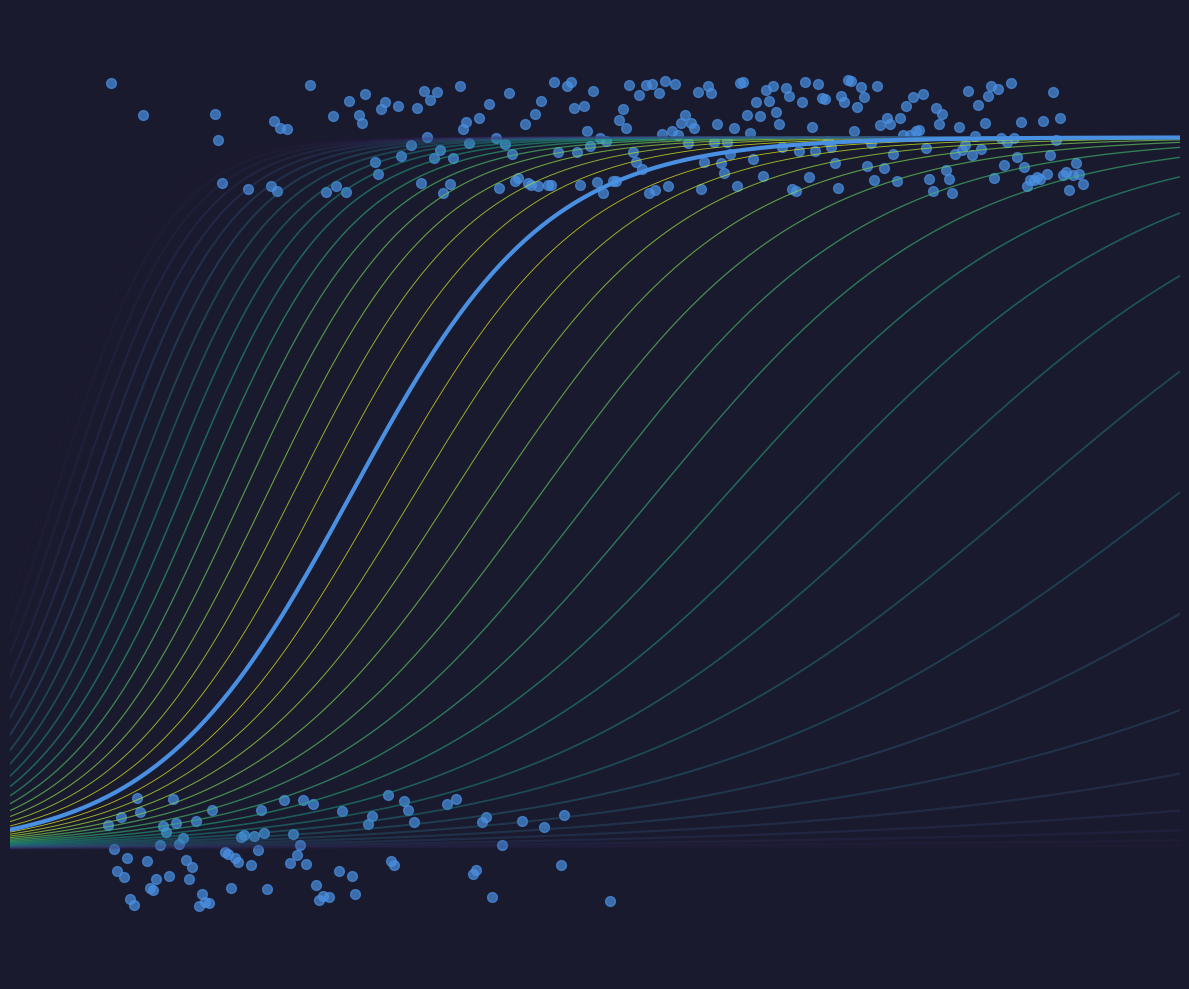

In [29]:


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# --- 1. Generate Synthetic Binomial Data (Single Type) ---
np.random.seed(42)  # for reproducibility

# True parameters (slope and intercept for the log-odds) for the single logistic model
true_m = 1.0    # Moderate positive slope
true_b = -2.5   # Shifted left, so P(y=1) becomes high for larger X values

# Define a single base color for all data points and the gradient lines
base_color_hex = '#4A90E2'  # Tomato Red (e.g., a warm, vibrant color)
base_color_rgb = mcolors.to_rgb(base_color_hex)

# Generate x values for the single dataset
X_data = np.linspace(0, 10, 300) # 300 points from 0 to 10
    
# Calculate the log-odds (logit)
logit = true_m * X_data + true_b

# Transform log-odds to probabilities using the sigmoid function
probabilities = 1 / (1 + np.exp(-logit))

# Generate binary y values by sampling from a Bernoulli distribution
y_data = np.random.binomial(1, probabilities, size=len(X_data))


# Create a smooth, broad X range for plotting the sigmoid curves
# This ensures curves are drawn smoothly across the entire visible X-axis
X_plot_range = np.linspace(np.min(X_data) - 2, np.max(X_data) + 2, 500)


# --- 2. Simulate Logistic Regression Optimization (Single Model) ---

line_data = [] # List to store optimization lines (m, b pairs)
num_steps_per_side = 20     # Number of optimization steps from each direction

# --- Parameters starting ABOVE the true log-odds line ---
initial_m_above = true_m + np.random.uniform(0.8, 1.8)
initial_b_above = true_b + np.random.uniform(3.0, 5.0)
slopes_above = np.linspace(initial_m_above, true_m, num_steps_per_side)
intercepts_above = np.linspace(initial_b_above, true_b, num_steps_per_side)

# --- Parameters starting BELOW the true log-odds line ---
initial_m_below = true_m - np.random.uniform(0.6, 1.2)
initial_b_below = true_b - np.random.uniform(2.0, 4.0)
slopes_below = np.linspace(initial_m_below, true_m, num_steps_per_side)
intercepts_below = np.linspace(initial_b_below, true_b, num_steps_per_side)

# Combine all generated slopes and intercepts
all_slopes = np.concatenate((slopes_above, slopes_below))
all_intercepts = np.concatenate((intercepts_above, intercepts_below))

# Calculate a 'distance' metric for each (m,b) pair from the true (m,b)
for m, b in zip(all_slopes, all_intercepts):
    distance = np.abs(m - true_m) + np.abs(b - true_b) # Simple L1 distance in parameter space
    line_data.append({'m': m, 'b': b, 'distance': distance})

# Sort lines by their distance to the true parameters (closest lines come LAST in the sorted list)
# This is crucial for the gradient and alpha to work correctly:
# lines with smaller 'i' (early in loop) are further away, lines with larger 'i' are closer.
line_data.sort(key=lambda x: x['distance'])


# --- 3. Plotting the Binomial Model Optimization Process ---

plt.style.use('dark_background') # Use a dark theme for the plot
fig, ax = plt.subplots(figsize=(12, 10))

background_color = '#1A1A2E' # A dark background color for the figure and axes
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points
# Apply jitter to y-coordinates for better visualization of binary data density (0 or 1)
y_jitter_amount = 0.08 # Amount of random vertical displacement
y_data_jittered = y_data + np.random.uniform(-y_jitter_amount, y_jitter_amount, len(y_data))
ax.scatter(X_data, y_data_jittered, color=base_color_hex, s=50, alpha=0.7, zorder=0)

# Plot the iterative logistic regression curves
total_lines = len(line_data)

# Define a darker version of the base color for the start of the gradient
# This creates a smooth transition from a dark hue to the bright base color
dark_start_color_rgb = tuple(c * 0.25 for c in base_color_rgb) 

# Plot the iterative regression lines (sigmoid curves), sorted by distance
for i, line_info in enumerate(line_data):
    current_m = line_info['m']
    current_b = line_info['b']

    # Calculate log-odds for the smooth plotting range (X_plot_range)
    current_logit = current_m * X_plot_range + current_b
    # Transform log-odds to probabilities (sigmoid curve)
    current_probabilities = 1 / (1 + np.exp(-current_logit))

    # Calculate 'ratio' for smooth color, alpha, and linewidth gradients
    # ratio goes from 0 (for the furthest line, i=0) to 1 (for the closest line, i=total_lines-1)
    ratio = i / (total_lines - 1) if total_lines > 1 else 1 

    # --- IMPLEMENTING GRADIENT COLOR FOR LINE DISTRIBUTION ---
    # Interpolate the line color from the dark_start_color_rgb to the base_color_rgb
    # As 'ratio' goes from 0 to 1, the color transitions from dark_start_color_rgb to base_color_rgb.
    current_line_color_rgb = tuple(
        dark_start_color_rgb[j] * (1 - ratio) + base_color_rgb[j] * ratio 
        for j in range(3)
    )
    # Convert the RGB tuple back to a hex string for Matplotlib plotting
    current_line_color_hex = cmap((total_lines - i )/ total_lines)
    # --- IMPLEMENTING INVERTED ALPHA (HIGHER ALPHA FOR NEAR LINES) ---
    # Alpha fades from a low value (e.g., 0.1) to a high value (e.g., 0.8) as lines get closer.
    # When 'ratio' is 0 (furthest line), alpha = 0.1.
    # When 'ratio' is 1 (closest line), alpha = 0.1 + 0.7 = 0.8.
    alpha = 0.1 + (ratio * 0.9) 
    
    # Line width also increases as lines get closer
    lw = 0.5 + (ratio * 1.5)    
    
    ax.plot(X_plot_range, current_probabilities, color=current_line_color_hex, linewidth=lw, alpha=1-alpha, zorder=1)

# Plot the final, "optimized" (true) logistic regression curve prominently
true_logit = true_m * X_plot_range + true_b
true_probabilities = 1 / (1 + np.exp(-true_logit))

ax.plot(X_plot_range, true_probabilities, color=base_color_hex, linewidth=3, linestyle='-', zorder=2)


# --- 4. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust x and y limits to ensure all lines and data points are visible
ax.set_xlim(np.min(X_data) - 1, np.max(X_data) + 1)
# Y-limits should comfortably show probabilities from 0 to 1, plus the jitter for data points
ax.set_ylim(-0.1 - y_jitter_amount, 1.1 + y_jitter_amount)

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False) # Ensure no grid lines are shown

plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show()

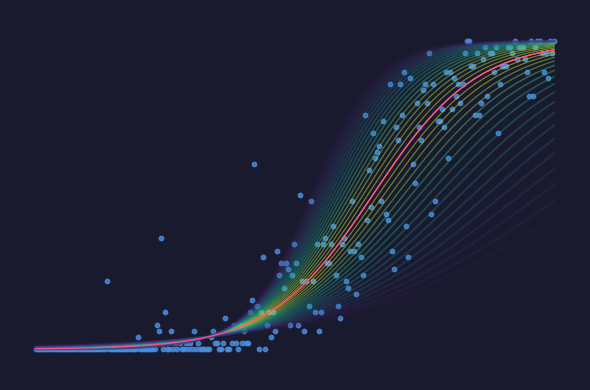

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit, logit
from scipy.stats import betabinom

# --- 1. Generate Synthetic Data for Beta-Binomial Regression ---

# True parameters for the underlying logistic relationship for the mean (mu)
# and log relationship for the dispersion (phi)
true_beta_mu = [-1.5, 0.5]  # Intercept and slope for logit(mu)
true_beta_phi = [2.0, 0.1]   # Intercept and slope for log(phi)

# Generate x values
np.random.seed(42)
X = np.linspace(-10, 10, 250)

# Calculate the true mean (mu) and dispersion (phi)
logit_mu_true = true_beta_mu[0] + true_beta_mu[1] * X
mu_true = expit(logit_mu_true)  # Inverse logit to get mu between 0 and 1

log_phi_true = true_beta_phi[0] + true_beta_phi[1] * X
phi_true = np.exp(log_phi_true)   # Inverse log to get phi > 0

# Convert (mu, phi) to (alpha, beta) for the beta distribution
alpha_true = mu_true * phi_true
beta_true = (1 - mu_true) * phi_true

# Number of trials for each data point
# CORRECTED LINE: Ensure 'n' is an integer array
n = np.full_like(X, 50, dtype=int) 

# Generate y values (number of successes) from the beta-binomial distribution
y = betabinom.rvs(n, alpha_true, beta_true, random_state=42)

# --- 2. Simulate Beta-Binomial Regression Optimization ---

# Define the number of steps for curves from each direction
num_steps_per_side = 20

# --- Parameters starting "ABOVE" the true curve ---
initial_beta_mu_above = [-0.5, 0.8]
initial_beta_phi_above = [3.0, 0.3]

betas_mu_above = np.linspace(initial_beta_mu_above, true_beta_mu, num_steps_per_side)
betas_phi_above = np.linspace(initial_beta_phi_above, true_beta_phi, num_steps_per_side)

# --- Parameters starting "BELOW" the true curve ---
initial_beta_mu_below = [-2.5, 0.2]
initial_beta_phi_below = [1.0, -0.1]

betas_mu_below = np.linspace(initial_beta_mu_below, true_beta_mu, num_steps_per_side)
betas_phi_below = np.linspace(initial_beta_phi_below, true_beta_phi, num_steps_per_side)


# Combine all generated parameters
all_betas_mu = np.concatenate((betas_mu_above, betas_mu_below))
all_betas_phi = np.concatenate((betas_phi_above, betas_phi_below))

# --- Calculate distance and sort curves ---
curve_data = []
for beta_mu, beta_phi in zip(all_betas_mu, all_betas_phi):
    # A simple distance metric: sum of absolute differences in parameters
    distance = np.sum(np.abs(beta_mu - true_beta_mu)) + np.sum(np.abs(beta_phi - true_beta_phi))
    curve_data.append({'beta_mu': beta_mu, 'beta_phi': beta_phi, 'distance': distance})

# Sort curves by their distance to the true curve (closest last)
curve_data.sort(key=lambda x: x['distance'])

total_curves = len(curve_data)

# --- 3. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points (as proportions y/n)
ax.scatter(X, y / n, color='#4A90E2', s=10, alpha=0.8, zorder=0)

# Choose a colormap that goes from dark to bright
cmap = plt.cm.viridis_r

# Plot the iterative regression curves (sorted by distance)
for i, curve_info in enumerate(curve_data):
    current_beta_mu = curve_info['beta_mu']
    current_beta_phi = curve_info['beta_phi']

    # Calculate predicted mu for the current set of parameters
    mu_pred = expit(current_beta_mu[0] + current_beta_mu[1] * X)
    
    # Line properties
    alpha = 0.6 - (i / (total_curves - 1)) * 0.5
    lw = 0.7 + (i / total_curves) * 1.3
    line_color = cmap(i / total_curves)
    
    ax.plot(X, mu_pred, color=line_color, linewidth=lw, alpha=alpha, zorder=1)

# Plot the final, "optimized" (true) regression curve prominently
ax.plot(X, mu_true, color='#FF4D8B', linewidth=1, linestyle='-', zorder=2)

# --- 4. Customize the Plot ---
ax.set_xlim(X.min() - 1, X.max() + 1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('auto', adjustable='box')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

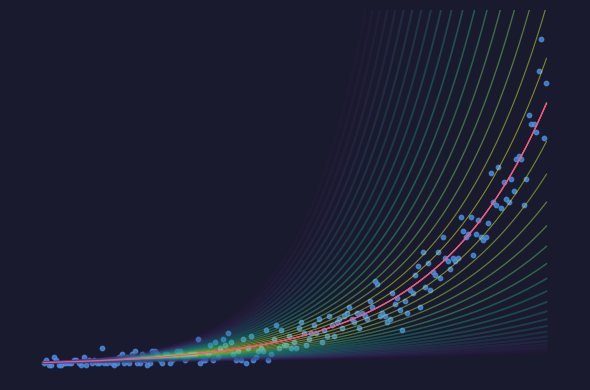

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# --- 1. Generate Synthetic Data for Poisson Regression ---

# True parameters for the underlying log-linear relationship
# log(lambda) = intercept + slope * X
true_beta = [1.5, 0.3]  # Intercept and slope

# Generate x values
np.random.seed(42)
X = np.linspace(-5, 10, 200)

# Calculate the true rate parameter (lambda)
log_lambda_true = true_beta[0] + true_beta[1] * X
lambda_true = np.exp(log_lambda_true)  # Inverse log to get lambda

# Generate y values (counts) from the Poisson distribution
y = poisson.rvs(lambda_true, random_state=42)

# --- 2. Simulate Poisson Regression Optimization ---

# Define the number of steps for curves from each direction
num_steps_per_side = 20

# --- Parameters starting "ABOVE" the true curve ---
initial_beta_above = [2.5, 0.5]  # Higher intercept and steeper slope

betas_above = np.linspace(initial_beta_above, true_beta, num_steps_per_side)

# --- Parameters starting "BELOW" the true curve ---
initial_beta_below = [0.5, 0.1]  # Lower intercept and shallower slope

betas_below = np.linspace(initial_beta_below, true_beta, num_steps_per_side)

# Combine all generated parameters
all_betas = np.concatenate((betas_above, betas_below))

# --- Calculate distance and sort curves ---
curve_data = []
for beta in all_betas:
    # A simple distance metric: sum of absolute differences in parameters
    distance = np.sum(np.abs(beta - true_beta))
    curve_data.append({'beta': beta, 'distance': distance})

# Sort curves by their distance to the true curve (closest last)
curve_data.sort(key=lambda x: x['distance'])

total_curves = len(curve_data)

# --- 3. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points
ax.scatter(X, y, color='#4A90E2', s=10, alpha=0.8, zorder=0)

# Choose a colormap that goes from dark to bright
cmap = plt.cm.viridis_r

# Plot the iterative regression curves (sorted by distance)
for i, curve_info in enumerate(curve_data):
    current_beta = curve_info['beta']
    
    # Calculate predicted lambda for the current set of parameters
    lambda_pred = np.exp(current_beta[0] + current_beta[1] * X)
    
    # Line properties
    alpha = 0.6 - (i / (total_curves - 1)) * 0.5
    lw = 0.7 + (i / total_curves) * 1.3
    line_color = cmap(i / total_curves)
    
    ax.plot(X, lambda_pred, color=line_color, linewidth=lw, alpha=alpha, zorder=1)

# Plot the final, "optimized" (true) regression curve prominently
ax.plot(X, lambda_true, color='#FF4D8B', linewidth=1, linestyle='-', zorder=2)

# --- 4. Customize the Plot ---
ax.set_xlim(X.min() - 1, X.max() + 1)
ax.set_ylim(y.min() - 5, y.max() + 10) # Expanded y-range for visibility
ax.set_aspect('auto', adjustable='box')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

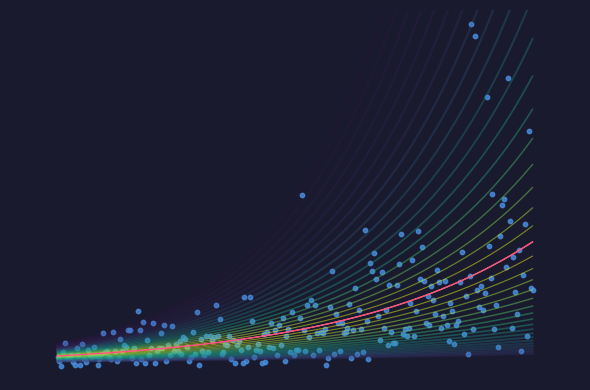

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import nbinom

# --- 1. Generate Synthetic Data for Negative Binomial Regression ---

# True parameters for the underlying log-linear relationship for the mean (mu)
# log(mu) = intercept + slope * X
true_beta = [2.0, 0.25]  # Intercept and slope

# True dispersion parameter (alpha). alpha > 0.
# As alpha approaches 0, the model approaches a standard Poisson model.
true_alpha = 0.5

# Generate x values
np.random.seed(42)
X = np.linspace(0, 10, 250)

# Calculate the true mean (mu)
log_mu_true = true_beta[0] + true_beta[1] * X
mu_true = np.exp(log_mu_true)

# The Negative Binomial distribution in SciPy is parameterized by n and p.
# We need to convert from the mean (mu) and dispersion (alpha) parameterization.
# The relationship is: n = 1 / alpha  and  p = n / (n + mu)
n_true = 1 / true_alpha
p_true = n_true / (n_true + mu_true)

# Generate y values (overdispersed counts) from the Negative Binomial distribution
y = nbinom.rvs(n=n_true, p=p_true, random_state=42)


# --- 2. Simulate Negative Binomial Regression Optimization ---

# Define the number of steps for curves from each direction
num_steps_per_side = 20

# --- Parameters starting "ABOVE" the true curve ---
initial_beta_above = [2.8, 0.4]    # Higher intercept and steeper slope
initial_alpha_above = 1.5           # Higher dispersion

betas_above = np.linspace(initial_beta_above, true_beta, num_steps_per_side)
alphas_above = np.linspace(initial_alpha_above, true_alpha, num_steps_per_side)

# --- Parameters starting "BELOW" the true curve ---
initial_beta_below = [1.2, 0.1]    # Lower intercept and shallower slope
initial_alpha_below = 0.05          # Lower dispersion

betas_below = np.linspace(initial_beta_below, true_beta, num_steps_per_side)
alphas_below = np.linspace(initial_alpha_below, true_alpha, num_steps_per_side)

# Combine all generated parameters
all_betas = np.concatenate((betas_above, betas_below))
all_alphas = np.concatenate((alphas_above, alphas_below))

# --- Calculate distance and sort curves ---
curve_data = []
for beta, alpha in zip(all_betas, all_alphas):
    # A simple distance metric: sum of absolute differences in all parameters
    distance = np.sum(np.abs(beta - true_beta)) + np.abs(alpha - true_alpha)
    curve_data.append({'beta': beta, 'alpha': alpha, 'distance': distance})

# Sort curves by their distance to the true curve (closest last)
curve_data.sort(key=lambda x: x['distance'])

total_curves = len(curve_data)

# --- 3. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points
ax.scatter(X, y, color='#4A90E2', s=10, alpha=0.8, zorder=0)

# Choose a colormap that goes from dark to bright
cmap = plt.cm.viridis_r

# Plot the iterative regression curves (sorted by distance)
# Note: We only plot the mean function. The 'alpha' parameter affects the
# variance around this mean, not the mean curve itself.
for i, curve_info in enumerate(curve_data):
    current_beta = curve_info['beta']
    
    # Calculate predicted mean (mu) for the current set of parameters
    mu_pred = np.exp(current_beta[0] + current_beta[1] * X)
    
    # Line properties
    alpha_val = 0.6 - (i / (total_curves - 1)) * 0.5
    lw = 0.7 + (i / total_curves) * 1.3
    line_color = cmap(i / total_curves)
    
    ax.plot(X, mu_pred, color=line_color, linewidth=lw, alpha=alpha_val, zorder=1)

# Plot the final, "optimized" (true) regression curve prominently
ax.plot(X, mu_true, color='#FF4D8B', linewidth=1, linestyle='-', zorder=2)

# --- 4. Customize the Plot ---
ax.set_xlim(X.min() - 1, X.max() + 1)
ax.set_ylim(y.min() - 10, y.max() + 10) # Expanded y-range for visibility
ax.set_aspect('auto', adjustable='box')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

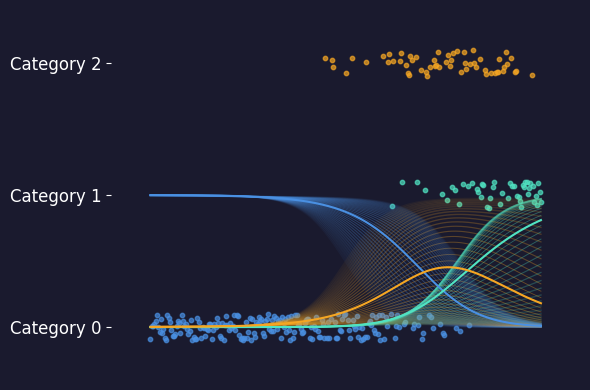

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

# --- 1. Generate Synthetic Data for Categorical Regression ---

# We will have 3 categories (K=3).
# The model needs (K-1) sets of parameters. We'll set the last category as the reference.
# True parameters for the log-odds of category 0 vs category 2
true_beta_0 = [2.0, -1.0]  # Intercept and slope for log(P(Y=0)/P(Y=2))
# True parameters for the log-odds of category 1 vs category 2
true_beta_1 = [-2.5, 0.8]  # Intercept and slope for log(P(Y=1)/P(Y=2))

# Combine into a parameter matrix
true_betas = np.array([true_beta_0, true_beta_1])

# Generate x values
np.random.seed(42)
X = np.linspace(-5, 5, 300)

# Calculate the linear predictors (logits)
# We add a column of zeros for the reference category (category 2)
logits_true = np.hstack([
    (true_betas[0, 0] + true_betas[0, 1] * X)[:, np.newaxis],
    (true_betas[1, 0] + true_betas[1, 1] * X)[:, np.newaxis],
    np.zeros((X.shape[0], 1))
])

# Use the softmax function to get probabilities for each class
probs_true = softmax(logits_true, axis=1)

# Generate y values (categorical outcomes) based on these probabilities
# We draw a random number and see which probability bin it falls into
y = (np.cumsum(probs_true, axis=1) < np.random.rand(X.shape[0])[:, np.newaxis]).sum(axis=1)


# --- 2. Simulate Multinomial Regression Optimization ---

num_steps_per_side = 20

# --- Parameters starting "ABOVE" (arbitrarily chosen) ---
initial_betas_above = np.array([[4.0, -0.2], [-1.0, 1.5]])
betas_above = np.linspace(initial_betas_above, true_betas, num_steps_per_side)

# --- Parameters starting "BELOW" (arbitrarily chosen) ---
initial_betas_below = np.array([[0.0, -1.8], [-4.0, 0.1]])
betas_below = np.linspace(initial_betas_below, true_betas, num_steps_per_side)

all_betas = np.concatenate((betas_above, betas_below))

# --- Calculate distance and sort curves ---
curve_data = []
for betas in all_betas:
    distance = np.sum(np.abs(betas - true_betas))
    curve_data.append({'betas': betas, 'distance': distance})

curve_data.sort(key=lambda x: x['distance'])
total_curves = len(curve_data)


# --- 3. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Define colors for the data points (and the converging lines)
category_colors = ['#4A90E2', '#50E3C2', '#F5A623'] # Blue, Teal, Orange

# Plot the original scattered data points with jitter for visibility
for i in range(3):
    ax.scatter(X[y==i], np.full(np.sum(y==i), i) + np.random.uniform(-0.1, 0.1, np.sum(y==i)),
               color=category_colors[i], s=10, alpha=0.7, zorder=0)

# Plot the iterative regression curves
for i, curve_info in enumerate(curve_data):
    current_betas = curve_info['betas']
    
    # Calculate predicted probabilities for the current set of parameters
    logits_pred = np.hstack([
        (current_betas[0, 0] + current_betas[0, 1] * X)[:, np.newaxis],
        (current_betas[1, 0] + current_betas[1, 1] * X)[:, np.newaxis],
        np.zeros((X.shape[0], 1))
    ])
    probs_pred = softmax(logits_pred, axis=1)
    
    # Line properties: alpha and linewidth change based on distance
    alpha_val = 0.4 - (i / (total_curves - 1)) * 0.35
    lw = 0.5 + (i / total_curves) * 1.0
    
    # Plot a probability curve for each category, using its respective data color
    for k in range(3):
        ax.plot(X, probs_pred[:, k], color=category_colors[k], linewidth=lw, alpha=alpha_val, zorder=1)

# *** CORRECTED SECTION ***
# Plot the final, "optimized" (true) probability curves prominently
# The order of colors is now correctly mapped to the categories based on the target image.
# Category 0 -> Yellow
# Category 1 -> Pink
# Category 2 -> Green
final_colors = ['#FFD600', '#FF4D8B', '#76FF03'] # Yellow, Pink, Bright Green
for k in range(3):
    ax.plot(X, probs_true[:, k], color=category_colors[k], linewidth=1.5, linestyle='-', zorder=2)


# --- 4. Customize the Plot ---
ax.set_xlim(X.min() - 1, X.max() + 1)
ax.set_ylim(-0.4, 2.4)
ax.set_aspect('auto', adjustable='box')

# Replace y-ticks with category labels
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Category 0', 'Category 1', 'Category 2'], color='white', fontsize=12)
ax.set_xticks([])
ax.set_xticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

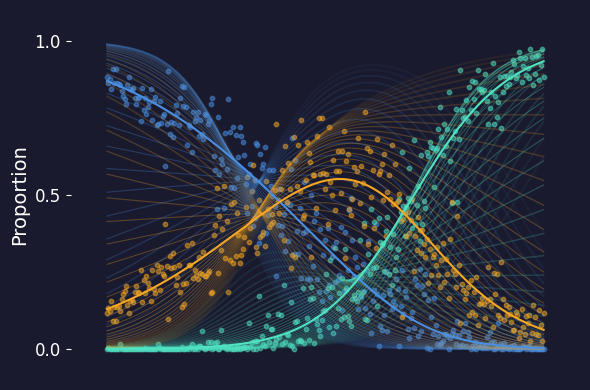

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Generate Synthetic Data for Dirichlet Regression ---

# We have 3 categories, so the outcome is a vector of 3 proportions [p0, p1, p2].
# Each category's concentration parameter (alpha) is modeled with a log link.
# log(alpha_k) = intercept_k + slope_k * X
true_betas = np.array([
    [1.5, -1.0],  # True intercept and slope for log(alpha_0)
    [0.5, 1.2],   # True intercept and slope for log(alpha_1)
    [2.0, -0.2]   # True intercept and slope for log(alpha_2)
])

# Generate x values
np.random.seed(42)
X = np.linspace(-3, 3, 300)

# Calculate the true alpha parameters for each X
# Note: In Dirichlet regression, each category gets its own equation.
log_alphas_true = np.zeros((X.shape[0], 3))
for k in range(3):
    log_alphas_true[:, k] = true_betas[k, 0] + true_betas[k, 1] * X
alphas_true = np.exp(log_alphas_true)

# Generate y values (proportion vectors) from the Dirichlet distribution
# y will be a 300x3 matrix, where each row is a set of proportions that sums to 1.
y_proportions = np.array([np.random.dirichlet(alpha_vec) for alpha_vec in alphas_true])


# --- 2. Simulate Dirichlet Regression Optimization ---

num_steps_per_side = 20

# --- Parameters starting "ABOVE" (arbitrarily chosen) ---
initial_betas_above = np.array([[3.0, 0.5], [-1.0, 2.0], [1.0, -1.5]])
betas_above = np.linspace(initial_betas_above, true_betas, num_steps_per_side)

# --- Parameters starting "BELOW" (arbitrarily chosen) ---
initial_betas_below = np.array([[0.0, -2.0], [2.0, 0.2], [3.0, 1.0]])
betas_below = np.linspace(initial_betas_below, true_betas, num_steps_per_side)

all_betas = np.concatenate((betas_above, betas_below))

# --- Calculate distance and sort curves ---
curve_data = []
for betas in all_betas:
    distance = np.sum(np.abs(betas - true_betas))
    curve_data.append({'betas': betas, 'distance': distance})

curve_data.sort(key=lambda x: x['distance'])
total_curves = len(curve_data)


# --- 3. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6,4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Define colors for the data points
category_colors = ['#4A90E2', '#50E3C2', '#F5A623'] # Blue, Teal, Orange

# Plot the original data points. For each X, we plot three points:
# (X, p0), (X, p1), and (X, p2).
for k in range(3):
    ax.scatter(X, y_proportions[:, k], color=category_colors[k], s=10, alpha=0.5, zorder=0)

# Plot the iterative regression curves
for i, curve_info in enumerate(curve_data):
    current_betas = curve_info['betas']
    
    # Calculate predicted alphas for the current set of parameters
    log_alphas_pred = np.zeros((X.shape[0], 3))
    for k in range(3):
        log_alphas_pred[:, k] = current_betas[k, 0] + current_betas[k, 1] * X
    alphas_pred = np.exp(log_alphas_pred)
    
    # The mean of a Dirichlet dist is alpha_k / sum(alphas)
    mean_proportions_pred = alphas_pred / np.sum(alphas_pred, axis=1, keepdims=True)
    
    # Line properties
    alpha_val = 0.4 - (i / (total_curves - 1)) * 0.35
    lw = 0.5 + (i / total_curves) * 1.0
    
    # Plot a curve for each category's expected proportion
    for k in range(3):
        ax.plot(X, mean_proportions_pred[:, k], color=category_colors[k], linewidth=lw, alpha=alpha_val, zorder=1)

# Plot the final, "optimized" (true) mean proportion curves
mean_proportions_true = alphas_true / np.sum(alphas_true, axis=1, keepdims=True)
final_colors = ['#FFD600', '#FF4D8B', '#76FF03'] # Yellow, Pink, Bright Green
for k in range(3):
    ax.plot(X, mean_proportions_true[:, k], color=category_colors[k], linewidth=1.5, linestyle='-', zorder=2)


# --- 4. Customize the Plot ---
ax.set_xlim(X.min() - 0.5, X.max() + 0.5)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('auto', adjustable='box')

# Adjust labels for a proportion model
ax.set_yticks([0, 0.5, 1.0])
ax.set_yticklabels(['0.0', '0.5', '1.0'], color='white', fontsize=12)
ax.set_ylabel('Proportion', color='white', fontsize=14)
ax.set_xticks([])
ax.set_xticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 1.737092
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


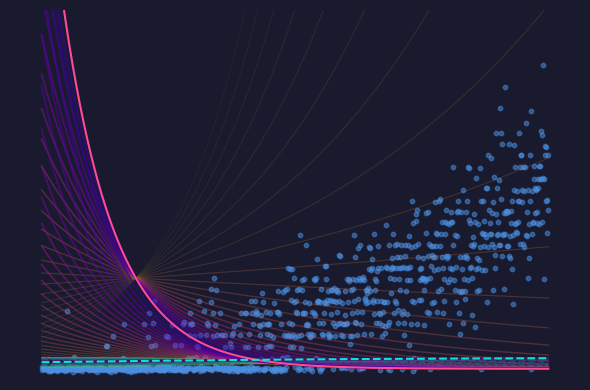

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.special import expit

# --- 1. Generate Synthetic Zero-Inflated Data ---

# for reproducibility
np.random.seed(42)

# Generate predictor variable
X = np.linspace(-2, 6, 1000)

# True parameters for the data generating process
true_b0_infl = 1.5
true_b1_infl = -1.2
true_b0_count = 1.0
true_b1_count = 0.3

# Calculate the true probabilities and means
p_true_zero = expit(true_b0_infl + true_b1_infl * X)
lambda_count = np.exp(true_b0_count + true_b1_count * X)

# Generate the response variable 'y'
y = np.zeros(X.shape[0])
is_structural_zero = np.zeros(X.shape[0], dtype=bool)

for i in range(X.shape[0]):
    if np.random.uniform(0, 1) < p_true_zero[i]:
        y[i] = 0
        is_structural_zero[i] = True
    else:
        y[i] = np.random.poisson(lambda_count[i])

# --- 2. Fit a Zero-Inflated Poisson (ZIP) Model ---

X_with_const = sm.add_constant(X)
# Fit the model to get the final, "optimal" parameters
zip_model = sm.ZeroInflatedPoisson(y, X_with_const, exog_infl=X_with_const).fit(maxiter=500)

# Extract the final fitted parameters
fitted_b0_count, fitted_b1_count = zip_model.params[:2]
fitted_b0_infl, fitted_b1_infl = zip_model.params[2:]

# --- 3. Simulate the Optimization/Convergence Process ---

num_steps_per_side = 25 # Number of lines to generate from each "direction"

# --- Parameters starting "away" from the true line ---
# We define initial parameter sets that are far from the fitted values
initial_params_sets = [
    {'count': (2.5, 0.8), 'infl': (3.0, -2.0)}, # Set 1: Above
    {'count': (-0.5, -0.2), 'infl': (-1.0, 0.5)}   # Set 2: Below
]

all_line_data = []

for initial_params in initial_params_sets:
    # Create interpolated parameters from initial to final for the count model
    b0_counts = np.linspace(initial_params['count'][0], fitted_b0_count, num_steps_per_side)
    b1_counts = np.linspace(initial_params['count'][1], fitted_b1_count, num_steps_per_side)

    # Create interpolated parameters from initial to final for the inflation model
    b0_infls = np.linspace(initial_params['infl'][0], fitted_b0_infl, num_steps_per_side)
    b1_infls = np.linspace(initial_params['infl'][1], fitted_b1_infl, num_steps_per_side)

    # Calculate distance for each step and store the parameters
    for i in range(num_steps_per_side):
        # A simple distance metric: sum of absolute differences in all four parameters
        distance = (np.abs(b0_counts[i] - fitted_b0_count) +
                    np.abs(b1_counts[i] - fitted_b1_count) +
                    np.abs(b0_infls[i] - fitted_b0_infl) +
                    np.abs(b1_infls[i] - fitted_b1_infl))
        
        all_line_data.append({
            'b0_c': b0_counts[i], 'b1_c': b1_counts[i],
            'b0_i': b0_infls[i], 'b1_i': b1_infls[i],
            'distance': distance
        })

# Sort all generated lines by their distance to the final model (closest last)
all_line_data.sort(key=lambda x: x['distance'], reverse=True)

total_lines = len(all_line_data)

# --- 4. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points
# Jitter y-values for better visualization
y_jitter = y + np.random.normal(0, 0.1, size=y.shape)
ax.scatter(X, y_jitter, color='#4A90E2', s=10, alpha=0.5, zorder=0)

# Define colormaps for the two model components
cmap_count = plt.cm.plasma_r  # For Poisson mean (lambda)
cmap_infl = plt.cm.viridis_r   # For Zero-inflation prob (p)

# Plot the iterative regression lines (now sorted by distance)
for i, line_info in enumerate(all_line_data):
    # Calculate the y-values for the current set of parameters
    current_lambda = np.exp(line_info['b0_c'] + line_info['b1_c'] * X)
    current_p_zero = expit(line_info['b0_i'] + line_info['b1_i'] * X)

    # Line properties: further lines (lower 'i') are more transparent and darker
    # Alpha increases from 0.05 to 0.6 as lines get closer
    alpha = 0.05 + (i / (total_lines - 1)) * 0.55
    # Line width increases slightly
    lw = 0.6 + (i / total_lines) * 1.0

    # Plot the count model line (lambda)
    ax.plot(X, current_lambda, color=cmap_count(i / total_lines), linewidth=lw, alpha=alpha, zorder=1)
    
    # Plot the inflation model line (p)
    ax.plot(X, current_p_zero, color=cmap_infl(i / total_lines), linewidth=lw, alpha=alpha, linestyle='--', zorder=1)


# Plot the final, "optimized" lines prominently
final_lambda = np.exp(fitted_b0_count + fitted_b1_count * X)
final_p_zero = expit(fitted_b0_infl + fitted_b1_infl * X)

ax.plot(X, final_lambda, color='#FF4D8B', linewidth=1.5, linestyle='-', zorder=2)
ax.plot(X, final_p_zero, color='#00EAD3', linewidth=1.5, linestyle='--', zorder=2)


# --- 5. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
ax.set_ylim(y.min() - 1, y.max() + 5)
ax.set_xlim(X.min() - 0.5, X.max() + 0.5)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

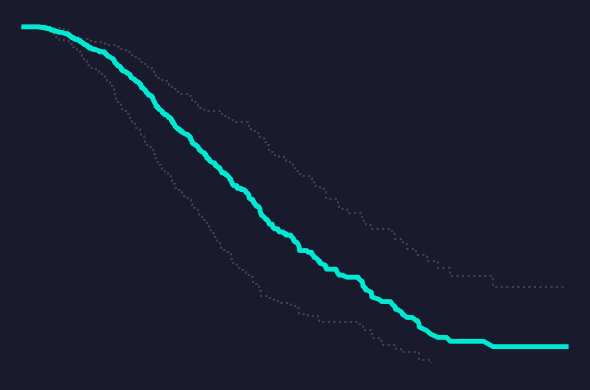

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter

# --- 1. Generate Synthetic Survival Data ---

# for reproducibility
np.random.seed(42)
n_samples = 500

# Generate a covariate 'X' (e.g., a risk score or treatment indicator)
X = np.random.normal(0, 1.5, n_samples)

# Define the true effect of the covariate (log-hazard ratio)
true_beta = 0.5 

# Generate true event times from a Weibull distribution
# The hazard ratio exp(beta*X) scales the time
hazard_ratio = np.exp(X * true_beta)
# Using Weibull distribution: AFT model T = (scale * (-log(U))^(1/shape)) / hazard_ratio
# Simplified approach: Draw from a baseline Weibull and scale by hazard
baseline_weibull_times = np.random.weibull(2.0, n_samples) * 100
true_event_times = baseline_weibull_times / (hazard_ratio ** (1/2.0))

# Generate censoring times (e.g., end of study period)
censoring_times = np.random.uniform(0, 200, n_samples)

# Observed time is the minimum of the event time and censoring time
observed_times = np.minimum(true_event_times, censoring_times)
# Event indicator is 1 if the event was observed, 0 if censored
event_observed = (true_event_times < censoring_times).astype(int)

# Create a DataFrame, which is standard for survival analysis libraries
df = pd.DataFrame({
    'time': observed_times,
    'event': event_observed,
    'X': X
})

# --- 2. Fit the Cox Proportional Hazards Model ---

# Instantiate and fit the model to get the final "optimal" parameter
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='event', formula="X")

# The fitted beta is the final parameter we converge to
fitted_beta = cph.params_['X']

# Get the baseline survival function from the fitted model
baseline_survival = cph.baseline_survival_

# --- 3. Simulate the Optimization Process ---

num_steps_per_side = 30 # Number of lines to generate

# Generate a range of beta values converging on the fitted_beta
betas_above = np.linspace(fitted_beta + 0.8, fitted_beta, num_steps_per_side)
betas_below = np.linspace(fitted_beta - 0.8, fitted_beta, num_steps_per_side)
all_betas = np.concatenate((betas_above, betas_below))

# Calculate distance for each beta and sort
line_data = [{'beta': b, 'distance': np.abs(b - fitted_beta)} for b in all_betas]
line_data.sort(key=lambda x: x['distance'], reverse=True)

total_lines = len(line_data)

# --- 4. Plotting the Optimization Process ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# --- Plot faint Kaplan-Meier curves for context ---
# This shows the raw survival estimates for high vs. low risk groups
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

high_risk_mask = df['X'] > df['X'].median()
kmf_high.fit(df['time'][high_risk_mask], df['event'][high_risk_mask])
kmf_low.fit(df['time'][~high_risk_mask], df['event'][~high_risk_mask])

kmf_high.plot_survival_function(ax=ax, color='gray', linestyle=':', linewidth=1.5, alpha=0.4, ci_show=False, zorder=0, label='_nolegend_')
kmf_low.plot_survival_function(ax=ax, color='gray', linestyle=':', linewidth=1.5, alpha=0.4, ci_show=False, zorder=0, label='_nolegend_')


# --- Plot the iterative survival curves ---
# We will plot the survival curve for an individual with the mean covariate value
mean_X = df['X'].mean()
cmap = plt.cm.plasma_r

for i, data in enumerate(line_data):
    current_beta = data['beta']
    
    # Calculate the survival function for this beta: S(t) = S0(t) ^ exp(beta * X)
    hazard_ratio_iter = np.exp(current_beta * mean_X)
    survival_prob_iter = baseline_survival ** hazard_ratio_iter
    
    # Line properties based on distance (closer = brighter, thicker, more opaque)
    alpha = 0.05 + (i / (total_lines - 1)) * 0.6
    lw = 0.6 + (i / total_lines) * 1.2
    
    ax.plot(survival_prob_iter.index, survival_prob_iter.values, color=cmap(i/total_lines), linewidth=lw, alpha=alpha, zorder=1)

# --- Plot the final, "optimized" survival curve ---
# Use the model's prediction function for the mean covariate value
final_survival_curve = cph.predict_survival_function(df.loc[df['X'].idxmax()], times=baseline_survival.index) # Using a sample row to predict
final_survival_curve_prob = baseline_survival ** np.exp(fitted_beta * mean_X)

ax.plot(final_survival_curve_prob.index, final_survival_curve_prob.values, color='#00EAD3', linewidth=3.5, zorder=2)


# --- 5. Customize the Plot (No Grid, No Axis, No Legend) ---
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(df['time'].min() - 5, df['time'].max() + 5)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

# Remove the default labels added by lifelines plot
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.get_legend().remove()


plt.tight_layout()
plt.show()

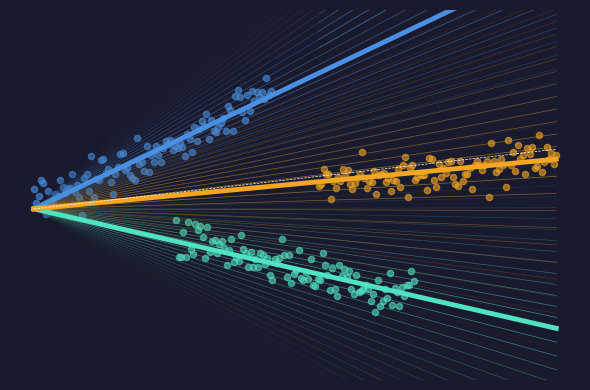

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# --- 1. Generate Synthetic Data for Varying Slopes ---
np.random.seed(0)  # for reproducibility

num_categories = 3
categories = ['A', 'B', 'C']

# Define distinct base colors for each category
category_colors_hex = {
    'A': '#4A90E2', # Light Blue
    'B': '#50E3C2', # Mint Green
    'C': '#F5A623'  # Light Pink
}
# Convert hex colors to RGB tuples for easier manipulation
category_colors_rgb = {k: mcolors.to_rgb(v) for k, v in category_colors_hex.items()}

# --- True parameters for a varying slope model ---
# All categories share the same intercept, but have different slopes.
true_common_intercept = 10
true_slopes = {
    'A': 2.5,
    'B': -1.2,
    'C': 0.5
}

# Lists to store all data points and their categories
X_data_all = []
y_data_all = []
category_labels_all = []

# Generate data for each category
for cat in categories:
    true_m = true_slopes[cat]

    # Generate x values, giving each category a slightly different range for visual separation
    x_cat = np.linspace(
        (categories.index(cat) * 6),          # Start x value
        (categories.index(cat) * 6) + 10,      # End x value
        100                                   # Number of points
    )
    
    noise = np.random.normal(0, 2.5, x_cat.shape) # Gaussian noise for y values
    y_true_cat = true_m * x_cat + true_common_intercept
    y_cat = y_true_cat + noise

    X_data_all.extend(x_cat)
    y_data_all.extend(y_cat)
    category_labels_all.extend([cat] * len(x_cat))

# Convert lists to NumPy arrays for easier handling
X_data_all = np.array(X_data_all)
y_data_all = np.array(y_data_all)


# --- 2. Simulate Linear Regression Optimization for Each Category's Slope ---

all_category_line_data = {} # Dictionary to store optimization lines for each category
num_steps_per_side = 20     # Number of optimization steps from each direction (above/below true slope)

for cat in categories:
    true_m = true_slopes[cat]

    # --- Slopes starting ABOVE the true line ---
    initial_m_above = true_m + np.random.uniform(2.0, 3.5)
    slopes_above = np.linspace(initial_m_above, true_m, num_steps_per_side)

    # --- Slopes starting BELOW the true line ---
    initial_m_below = true_m - np.random.uniform(2.0, 3.5)
    slopes_below = np.linspace(initial_m_below, true_m, num_steps_per_side)

    # Combine all generated slopes for the current category
    all_slopes_cat = np.concatenate((slopes_above, slopes_below))

    # Calculate a 'distance' metric for each line from the true line based on the slope
    line_data_cat = []
    for m in all_slopes_cat:
        distance = np.abs(m - true_m) # Simple L1 distance for the slope
        line_data_cat.append({'m': m, 'b': true_common_intercept, 'distance': distance})

    # Sort lines by their distance to the true line (closest lines come last)
    line_data_cat.sort(key=lambda x: x['distance'], reverse=True)
    all_category_line_data[cat] = line_data_cat

# --- 3. Calculate the Mean (Pooled) Model ---
mean_slope = np.mean(list(true_slopes.values()))


# --- 4. Plotting the Varying Slope Model Optimization Process ---

plt.style.use('dark_background') # Use a dark theme for the plot
fig, ax = plt.subplots(figsize=(6, 4))

fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points, colored based on their category
for cat in categories:
    cat_X = [X_data_all[i] for i, label in enumerate(category_labels_all) if label == cat]
    cat_y = [y_data_all[i] for i, label in enumerate(category_labels_all) if label == cat]
    ax.scatter(cat_X, cat_y, color=category_colors_hex[cat], s=20, alpha=0.6, zorder=0)

# Plot the iterative regression lines for each category
for cat in categories:
    line_data_cat = all_category_line_data[cat]
    total_lines = len(line_data_cat)
    base_color_rgb = category_colors_rgb[cat]
    
    dark_start_color_rgb = tuple(c * 0.1 for c in base_color_rgb) 

    for i, line_info in enumerate(line_data_cat):
        current_m = line_info['m']
        current_b = line_info['b'] # This will always be the true_common_intercept

        y_pred = current_m * X_data_all + current_b

        ratio = i / (total_lines - 1) if total_lines > 1 else 1

        current_line_color_rgb = tuple(
            dark_start_color_rgb[j] * (1 - ratio) + base_color_rgb[j] * ratio 
            for j in range(3)
        )
        current_line_color_hex = mcolors.to_hex(current_line_color_rgb)

        alpha = (0.05 + (ratio * 0.6))
        lw = 0.5 + (ratio * 1.5)
        
        ax.plot(X_data_all, y_pred, color=current_line_color_hex, linewidth=0.5, alpha=alpha, zorder=1)

    # Plot the final, "optimized" (true) regression line for each category
    true_m = true_slopes[cat]
    ax.plot(X_data_all, true_m * X_data_all + true_common_intercept, color=category_colors_hex[cat], linewidth=3.5, linestyle='-', zorder=2)

# Plot the mean (pooled) regression line
ax.plot(X_data_all, mean_slope * X_data_all + true_common_intercept, color='#FFFFFF', linewidth=0.5, linestyle='--', zorder=3, label='Mean Model')


# --- 5. Customize the Plot ---
ax.set_xlim(np.min(X_data_all) - 1, np.max(X_data_all) + 1)
ax.set_ylim(np.min(y_data_all) - 15, np.max(y_data_all) + 15)

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

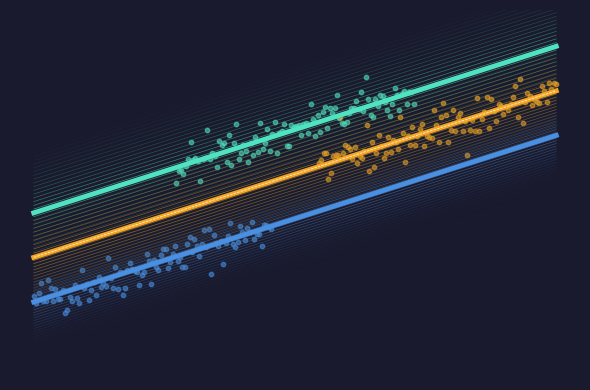

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# --- 1. Generate Synthetic Data for Varying Intercepts ---
np.random.seed(42)  # for reproducibility

num_categories = 3
categories = ['A', 'B', 'C']

# Define distinct base colors for each category
category_colors_hex = {
    'A': '#4A90E2', # Light Blue
    'B': '#50E3C2', # Light Green
    'C': '#F5A623'  # Light Red
}
# Convert hex colors to RGB tuples for easier manipulation
category_colors_rgb = {k: mcolors.to_rgb(v) for k, v in category_colors_hex.items()}

# --- True parameters for a varying intercept model ---
# All categories share the same slope, but have different intercepts.
true_common_slope = 1.7
true_intercepts = {
    'A': 5,
    'B': 25,
    'C': 15
}

# Lists to store all data points and their categories
X_data_all = []
y_data_all = []
category_labels_all = []

# Generate data for each category
for cat in categories:
    true_b = true_intercepts[cat]

    # Generate x values, giving each category a slightly different range for visual separation
    x_cat = np.linspace(
        (categories.index(cat) * 6),          # Start x value
        (categories.index(cat) * 6) + 10,     # End x value
        100                                   # Number of points
    )
    
    noise = np.random.normal(0, 2.5, x_cat.shape) # Gaussian noise for y values
    y_true_cat = true_common_slope * x_cat + true_b
    y_cat = y_true_cat + noise

    X_data_all.extend(x_cat)
    y_data_all.extend(y_cat)
    category_labels_all.extend([cat] * len(x_cat))

# Convert lists to NumPy arrays for easier handling
X_data_all = np.array(X_data_all)
y_data_all = np.array(y_data_all)


# --- 2. Simulate Linear Regression Optimization for Each Category's Intercept ---

all_category_line_data = {} # Dictionary to store optimization lines for each category
num_steps_per_side = 20     # Number of optimization steps from each direction (above/below true intercept)

for cat in categories:
    true_b = true_intercepts[cat]

    # --- Intercepts starting ABOVE the true line ---
    initial_b_above = true_b + np.random.uniform(10.0, 18.0)
    intercepts_above = np.linspace(initial_b_above, true_b, num_steps_per_side)

    # --- Intercepts starting BELOW the true line ---
    initial_b_below = true_b - np.random.uniform(10.0, 18.0)
    intercepts_below = np.linspace(initial_b_below, true_b, num_steps_per_side)

    # Combine all generated intercepts for the current category
    all_intercepts_cat = np.concatenate((intercepts_above, intercepts_below))

    # Calculate a 'distance' metric for each line from the true line based on the intercept
    line_data_cat = []
    for b in all_intercepts_cat:
        distance = np.abs(b - true_b) # Simple L1 distance for the intercept
        line_data_cat.append({'m': true_common_slope, 'b': b, 'distance': distance})

    # Sort lines by their distance to the true line (closest lines come last)
    line_data_cat.sort(key=lambda x: x['distance'], reverse=True)
    all_category_line_data[cat] = line_data_cat

# --- 3. Calculate the Mean (Pooled) Model ---
mean_intercept = np.mean(list(true_intercepts.values()))


# --- 4. Plotting the Varying Intercept Model Optimization Process ---

plt.style.use('dark_background') # Use a dark theme for the plot
fig, ax = plt.subplots(figsize=(6, 4))


fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points, colored based on their category
for cat in categories:
    cat_X = [X_data_all[i] for i, label in enumerate(category_labels_all) if label == cat]
    cat_y = [y_data_all[i] for i, label in enumerate(category_labels_all) if label == cat]
    ax.scatter(cat_X, cat_y, color=category_colors_hex[cat], s=10, alpha=0.6, zorder=0)

# Plot the iterative regression lines for each category
for cat in categories:
    line_data_cat = all_category_line_data[cat]
    total_lines = len(line_data_cat)
    base_color_rgb = category_colors_rgb[cat]
    
    dark_start_color_rgb = tuple(c * 0.1 for c in base_color_rgb) 

    for i, line_info in enumerate(line_data_cat):
        current_m = line_info['m'] # This is always the true_common_slope
        current_b = line_info['b']

        y_pred = current_m * X_data_all + current_b

        ratio = i / (total_lines - 1) if total_lines > 1 else 1

        current_line_color_rgb = tuple(
            dark_start_color_rgb[j] * (1 - ratio) + base_color_rgb[j] * ratio 
            for j in range(3)
        )
        current_line_color_hex = mcolors.to_hex(current_line_color_rgb)

        alpha = (0.05 + (ratio * 0.6))
        lw = 0.5 + (ratio * 1.5)
        
        ax.plot(X_data_all, y_pred, color=current_line_color_hex, linewidth=.5, alpha=alpha, zorder=1)

    # Plot the final, "optimized" (true) regression line for each category
    true_b = true_intercepts[cat]
    ax.plot(X_data_all, true_common_slope * X_data_all + true_b, color=category_colors_hex[cat], linewidth=3.5, linestyle='-', zorder=2)

# Plot the mean (pooled) regression line
ax.plot(X_data_all, true_common_slope * X_data_all + mean_intercept, color='#FFFFFF', linewidth=.5, linestyle='--', zorder=3, label='Mean Model')


# --- 5. Customize the Plot ---
ax.set_xlim(np.min(X_data_all) - 1, np.max(X_data_all) + 1)
ax.set_ylim(np.min(y_data_all) - 15, np.max(y_data_all) + 15)

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

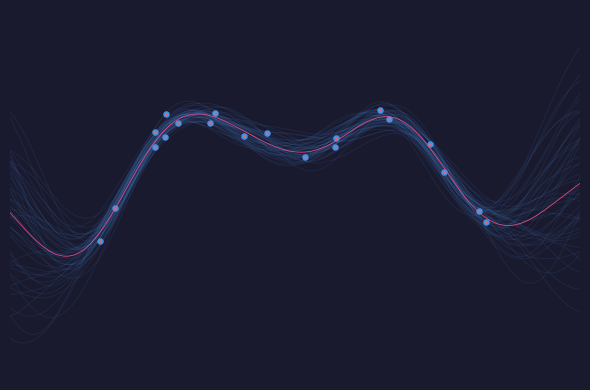

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# --- 1. Generate Synthetic Non-Linear Data ---
np.random.seed(42)

def true_function(X):
    """A sample non-linear function to model."""
    return np.sin(0.9 * X) * X

# Generate sparse, noisy data points that the GP will learn from
X_train = np.random.uniform(-5, 5, 20).reshape(-1, 1)
y_train = true_function(X_train).ravel() + np.random.normal(0, 0.5, X_train.shape[0])

# Generate a dense set of points for plotting the GP's predictions
X_plot = np.linspace(-7, 7, 500).reshape(-1, 1)


# --- 2. Define and Fit the Gaussian Process Model ---

# Define the kernel for the Gaussian Process.
# RBF (Radial Basis Function) kernel is a common choice that creates smooth functions.
# It has a length_scale parameter that controls the "wiggliness" of the function.
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create the Gaussian Process Regressor object
gp_model = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10, # Run the optimizer multiple times to find better kernel parameters
    alpha=0.1,               # Noise level, helps with stability
    normalize_y=True
)

# Fit the model to the training data
gp_model.fit(X_train, y_train)


# --- 3. Generate Predictions and Samples from the Fitted GP ---

# Get the posterior mean and standard deviation (for the confidence interval)
y_mean, y_std = gp_model.predict(X_plot, return_std=True)

# Generate a number of sample functions from the posterior distribution
# These are the "plausible functions" that the model thinks could represent the data.
num_samples = 50
y_samples = gp_model.sample_y(X_plot, n_samples=num_samples)


# --- 4. Plotting the Gaussian Process Model ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# --- Plot the components ---

# a) Plot the posterior samples (the distribution of functions)
sample_color = '#4A90E2' # A bright blue for the samples
ax.plot(X_plot, y_samples, color=sample_color, lw=0.7, alpha=0.1, zorder=1)

# b) Plot the mean prediction line
mean_color = '#FF4D8B' # White for high contrast
ax.plot(X_plot, y_mean, color=mean_color, lw=.5, zorder=10, label='Mean Prediction')

# c) Plot the confidence interval (95%)
confidence_color = '#50C878' # An emerald green for the confidence interval
#ax.fill_between(
#    X_plot.ravel(),
#    y_mean - 1.96 * y_std,
#    y_mean + 1.96 * y_std,
#    color=confidence_color,
#    alpha=0.3,
#    zorder=2,
#    label='95% Confidence Interval'
#)

# d) Plot the original training data points
data_point_color = '#FF6347' # A bright red for the data points
ax.scatter(X_train, y_train, color=data_point_color, s=10, zorder=4, edgecolors='#4A90E2', linewidth=1.5, label='Observed Data')


# --- 5. Customize the Plot for a Clean Look ---
ax.set_xlim(-7, 7)
ax.set_ylim(np.min(y_samples) - 2, np.max(y_samples) + 2)

# Remove all axis ticks, labels, and spines
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [a, bA, s, D_true]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 62 seconds.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/tmp/ipykernel_44674/3437114121.py:97: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = az.hdi(posterior_lines, hdi_prob=0.94)


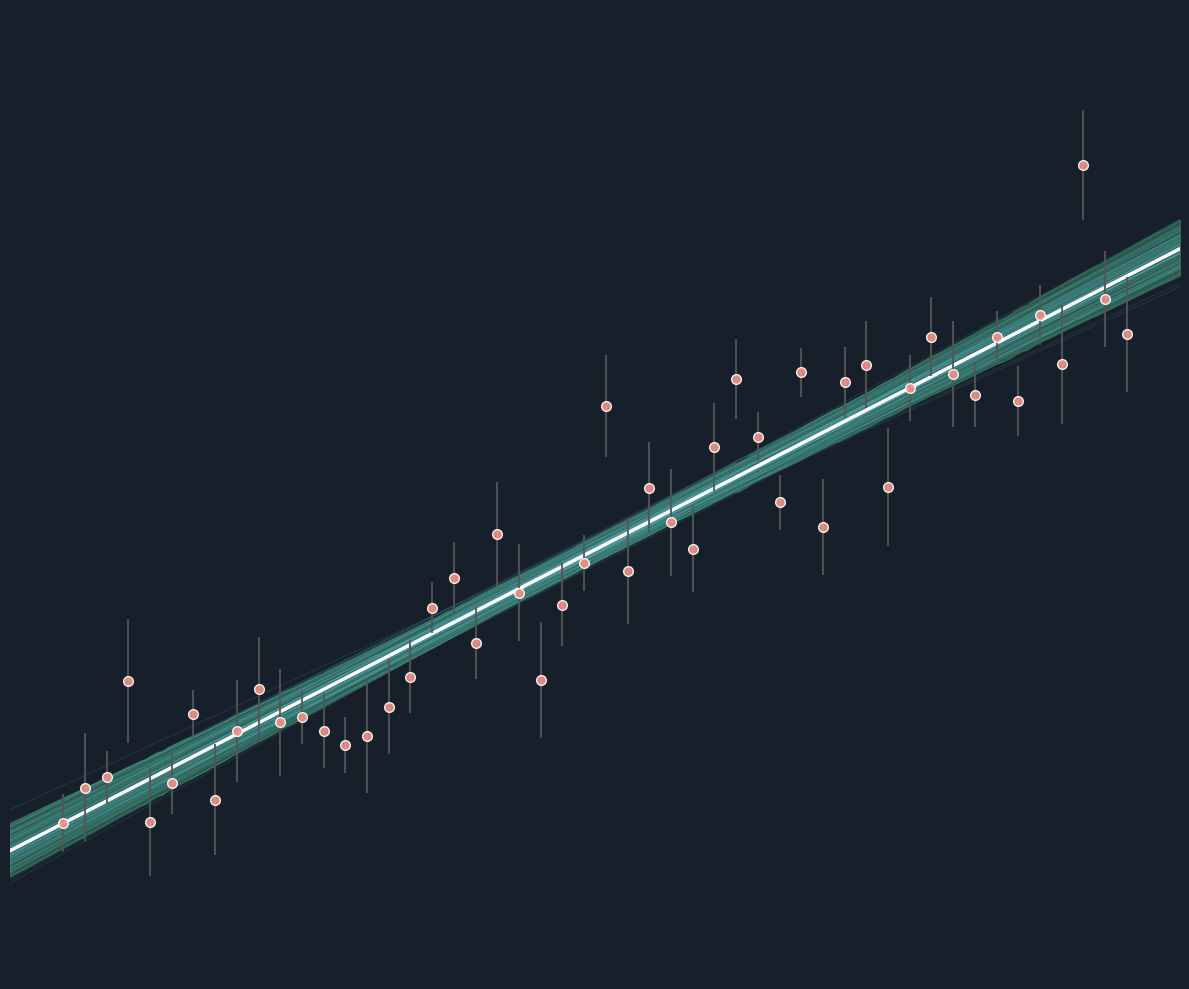

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az

# --- 1. Generate Synthetic Data ---
# This is the same data generation process as the previous example.
np.random.seed(42)

# a) True underlying relationship (unobservable)
true_a = 2.5
true_b = 1.8
true_s = 2.0  # Process noise

# b) Generate predictor variable and the true line
A = np.linspace(0, 20, 50)
true_line = true_a + true_b * A

# c) Add process noise to get the "actual" values before measurement
D_true_actual = true_line + np.random.normal(0, true_s, size=A.shape[0])

# d) Simulate known measurement error for each data point
D_sd = np.random.uniform(1.5, 4.0, size=A.shape[0])
D_obs = D_true_actual + np.random.normal(0, D_sd)

# --- 2. Create a Helper to Mimic the Requested Syntax ---

class ModelBuilder:
    """A helper class to wrap PyMC's syntax to match the user's request."""
    class Dist:
        def normal(self, mu, sigma, name=None, obs=None):
            # This maps the conceptual syntax to a real PyMC distribution
            return pm.Normal(name, mu=mu, sigma=sigma, observed=obs)

        def exponential(self, lam, name=None):
            return pm.Exponential(name, lam=lam)
    
    def __init__(self):
        self.dist = self.Dist()

    # The likelihood function is also part of the wrapper
    def normal(self, mu, sigma, obs=None):
        # The 'likelihood' is just an unnamed distribution with observed data
        return pm.Normal("likelihood", mu=mu, sigma=sigma, observed=obs)

# Instantiate the model builder
m = ModelBuilder()

# --- 3. Define the Model Using the Custom Syntax ---

def define_model(D_obs, D_sd, A):
    """
    Defines the Bayesian model using the m.dist syntax.
    
    Note: The conceptual `sample=True` argument is realized by running the
    pm.sample() function on the entire model context.
    """
    with pm.Model() as pymc_model:
        # Priors
        a = m.dist.normal(0, 10, name='a')
        bA = m.dist.normal(0, 10, name='bA')
        s = m.dist.exponential(1.0, name='s')
        
        # Linear Model
        mu = a + bA * A
        
        # Latent Variable (the "true" unobserved values)
        D_true = m.dist.normal(mu, s, name='D_true')
        
        # Likelihood (connecting the model to observed data)
        m.normal(D_true, D_sd, obs=D_obs)
        
    return pymc_model

# Create the actual PyMC model object
hierarchical_model = define_model(D_obs, D_sd, A)

# --- 4. Perform Inference (The "Sampling" Step) ---
# This is where the model is fitted to the data to get the posterior.
with hierarchical_model:
    trace = pm.sample(2000, tune=1000, chains=4, target_accept=0.95, cores=1)

# --- 5. Extract and Process Posterior Results ---

X_plot = np.linspace(np.min(A) - 1, np.max(A) + 1, 200)

# Extract posterior samples for the slope and intercept
post = trace.posterior
post_a = post['a'].values.flatten()
post_bA = post['bA'].values.flatten()

# Generate the posterior lines (the "line distribution")
posterior_lines = post_a[:, np.newaxis] + post_bA[:, np.newaxis] * X_plot

# Calculate the mean line and the 94% Highest Density Interval (HDI)
mean_line = np.mean(posterior_lines, axis=0)
hdi_data = az.hdi(posterior_lines, hdi_prob=0.94)


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [a, bA, s, D_true]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 50 seconds.
There were 239 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


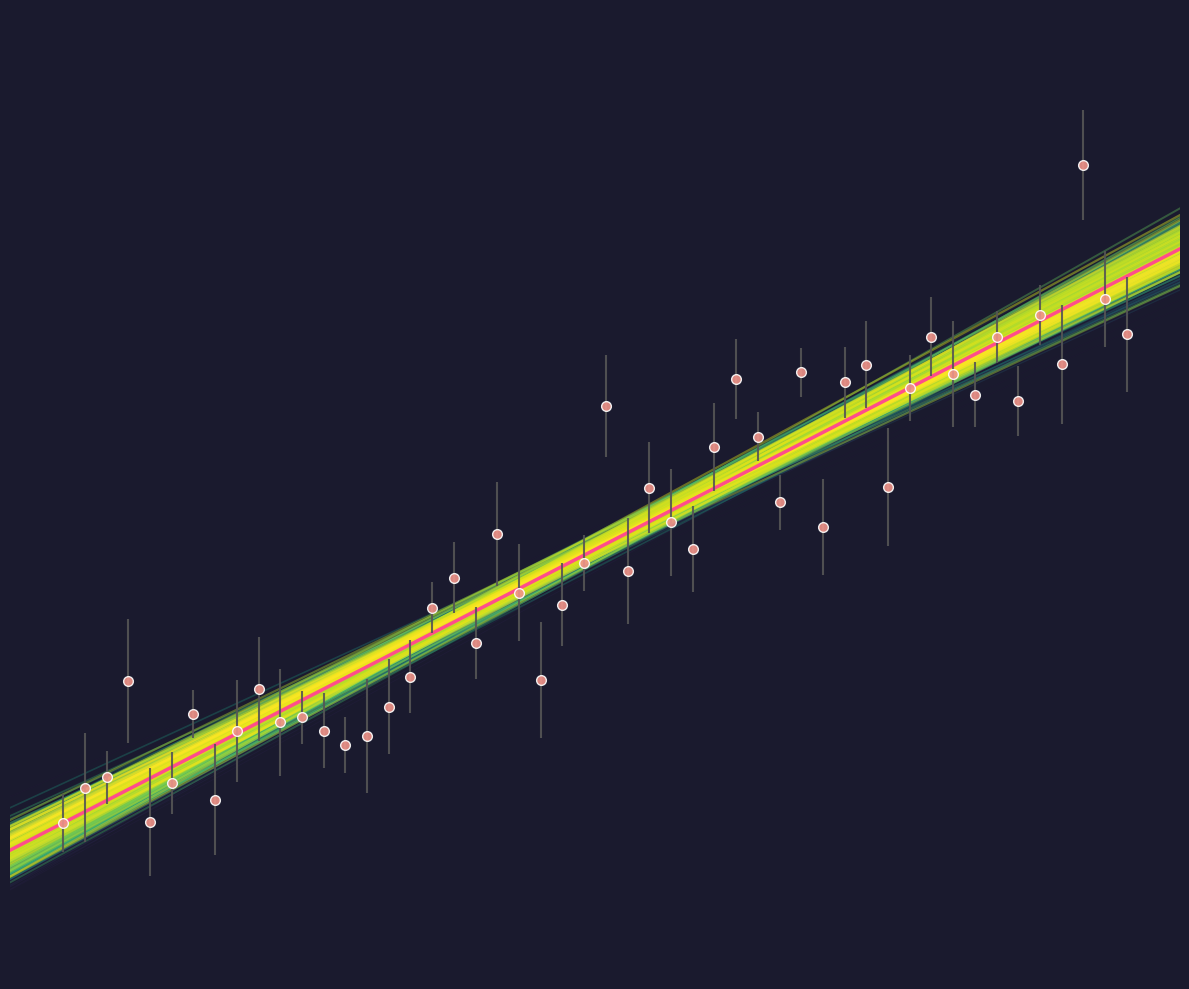

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az
import pandas as pd

# --- 1. Generate Synthetic Data ---
np.random.seed(42)

# a) True underlying relationship (unobservable)
true_a = 2.5
true_b = 1.8
true_s = 2.0  # Process noise

# b) Generate predictor variable and the true line
A = np.linspace(0, 20, 50)
true_line = true_a + true_b * A

# c) Add process noise to get the "actual" values before measurement
D_true_actual = true_line + np.random.normal(0, true_s, size=A.shape[0])

# d) Simulate known measurement error for each data point
D_sd = np.random.uniform(1.5, 4.0, size=A.shape[0])
D_obs = D_true_actual + np.random.normal(0, D_sd)

# --- 2. Define and Fit the Bayesian Model (using PyMC) ---
with pm.Model() as measurement_error_model:
    a = pm.Normal('a', mu=0, sigma=10)
    bA = pm.Normal('bA', mu=0, sigma=10)
    s = pm.Exponential('s', lam=1.0)
    
    mu = a + bA * A
    D_true = pm.Normal('D_true', mu=mu, sigma=s, shape=A.shape[0])
    
    # --- THIS IS THE CORRECTED LINE ---
    # It now correctly uses D_sd, which was defined in the data generation step.
    likelihood = pm.Normal('likelihood', mu=D_true, sigma=D_sd, observed=D_obs)
    
    trace = pm.sample(2000, tune=1000, chains=4, target_accept=0.95, cores=1)


# --- 3. Extract and SORT Posterior Samples by Probability ---
# Extract the posterior samples for slope and intercept
post = trace.posterior
post_a = post['a'].values.flatten()
post_bA = post['bA'].values.flatten()

# Extract the log-posterior probability for each sample
log_posterior = trace.sample_stats.lp.values.flatten()

# Combine parameters and their log-probability into a DataFrame for easy sorting
posterior_df = pd.DataFrame({
    'a': post_a,
    'bA': post_bA,
    'log_p': log_posterior
})

# Sort the entire DataFrame from worst fit (lowest log_p) to best fit (highest log_p)
posterior_df_sorted = posterior_df.sort_values('log_p').reset_index(drop=True)

# Generate lines based on the SORTED parameters
X_plot = np.linspace(np.min(A) - 1, np.max(A) + 1, 200)
sorted_lines = (posterior_df_sorted['a'].values[:, np.newaxis] +
                posterior_df_sorted['bA'].values[:, np.newaxis] * X_plot)

# Calculate the mean line for plotting
mean_line = np.mean(sorted_lines, axis=0)
total_lines = len(posterior_df_sorted)


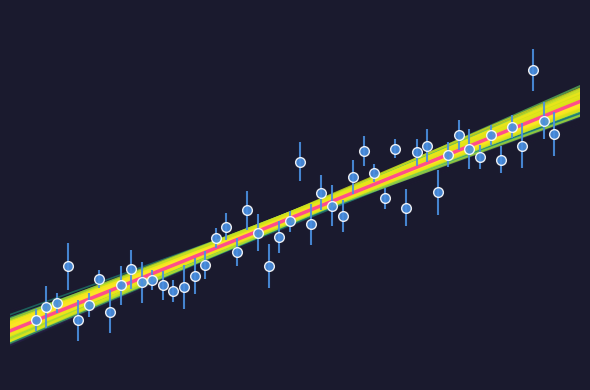

In [13]:


# --- 4. Plotting the Results with Gradients (as you specified) ---

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# a) Plot the distribution of plausible regression lines with a gradient
cmap = plt.cm.viridis 

# Plot a subset of lines to avoid a completely solid plot
num_lines_to_plot = 500
indices = np.linspace(0, total_lines - 1, num_lines_to_plot).astype(int)

for i in indices:
    ratio = i / (total_lines - 1)
    
    line_color = cmap(ratio)
    alpha_val = 0.05 + (ratio * 0.8)
    lw = 0.5 + (ratio * 1.2)
    
    ax.plot(X_plot, sorted_lines[i, :], color=line_color, linewidth=lw, alpha=alpha_val, zorder=1)

# b) Plot the posterior mean line (best guess)
ax.plot(X_plot, mean_line, color='#FF4D8B', lw=2.5, zorder=3)

# c) Plot the observed data points with their specific measurement error bars
ax.errorbar(A, D_obs, yerr=D_sd, fmt='o', color='#4A90E2', ecolor='#4A90E2',
            elinewidth=1.5, capsize=0, markersize=7, markeredgecolor='white',
            markeredgewidth=1.0, alpha=0.9, zorder=4)

# --- 5. Customize the Plot ---
ax.set_xlim(np.min(X_plot), np.max(X_plot))
ax.set_ylim(np.min(D_obs) - 10, np.max(D_obs) + 10)

# Remove all axis ticks, labels, and spines for a clean look
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)
plt.tight_layout()
plt.show()

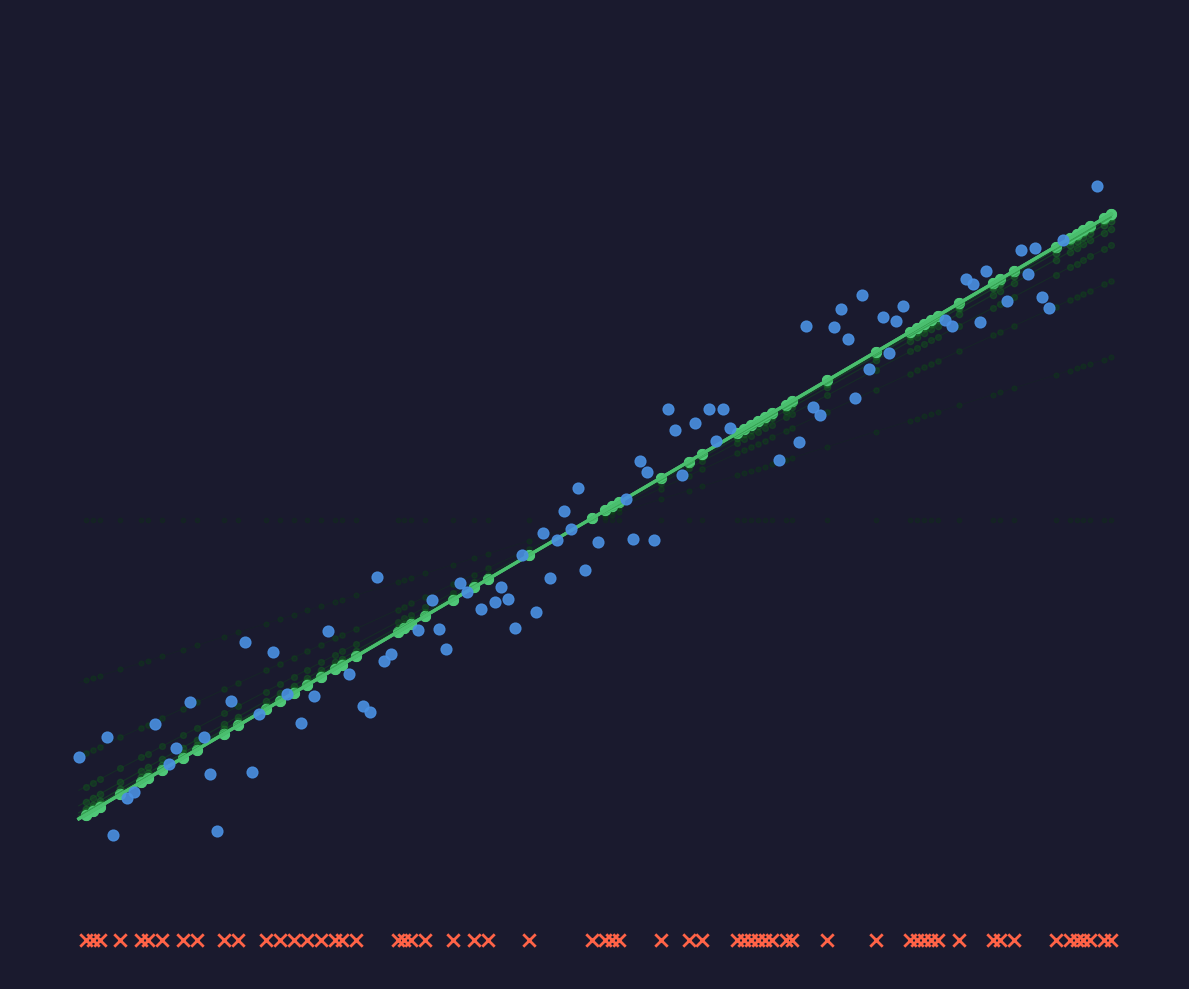

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

# --- 1. Generate Synthetic Data with a Clear Linear Trend ---
np.random.seed(0)

# True parameters for the underlying linear relationship
true_m, true_b = 2.8, 8
X_data = np.linspace(0, 15, 150)
noise = np.random.normal(0, 2.5, X_data.shape)
y_data = true_m * X_data + true_b + noise

# --- 2. Introduce Missing Data ---
# Randomly select indices for which the y-values will be missing
missing_fraction = 0.4
n_points = len(X_data)
missing_indices = np.random.choice(n_points, size=int(n_points * missing_fraction), replace=False)
observed_indices = np.array(list(set(range(n_points)) - set(missing_indices)))

# Split the data into observed and missing sets
X_observed, y_observed = X_data[observed_indices], y_data[observed_indices]
X_missing, y_true_missing = X_data[missing_indices], y_data[missing_indices] # Keep true values for visualization

# --- 3. Simulate an Iterative Imputation and Modeling Process ---
num_imputation_steps = 15
imputed_ys_over_time = [] # To store the y-values of missing points at each step
model_params_over_time = [] # To store the model's slope and intercept at each step

# Start with a naive imputation (mean of observed y)
current_y_imputed = np.full(X_missing.shape, y_observed.mean())
imputed_ys_over_time.append(current_y_imputed.copy())

# Iteratively refine the imputed values
for step in range(num_imputation_steps):
    # Combine observed data with the current imputed data
    X_full_current = np.concatenate((X_observed, X_missing))
    y_full_current = np.concatenate((y_observed, current_y_imputed))

    # Fit a linear regression model on the combined data
    model = LinearRegression()
    model.fit(X_full_current.reshape(-1, 1), y_full_current)
    
    # Store the model parameters
    model_params_over_time.append({'m': model.coef_[0], 'b': model.intercept_})

    # Update the imputed y-values based on the new model's predictions
    current_y_imputed = model.predict(X_missing.reshape(-1, 1))
    
    # Store the newly imputed y-values
    imputed_ys_over_time.append(current_y_imputed.copy())

# --- 4. Plotting the Imputation and Modeling Process ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 10))

# Define colors
background_color = '#1A1A2E'
observed_color = '#4A90E2' # Bright Blue
imputed_start_color = '#004d00' # Very Dark Green
imputed_end_color = '#50C878' # Bright Emerald Green
missing_marker_color = '#FF6347' # Tomato Red

fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the observed data points prominently
ax.scatter(X_observed, y_observed, color=observed_color, s=60, alpha=0.9, zorder=3, label='Observed Data')

# Plot markers on the x-axis to indicate where data is missing
ax.scatter(X_missing, np.full(X_missing.shape, ax.get_ylim()[0] - 5), color=missing_marker_color, marker='x', s=80, lw=2, zorder=3, label='Missing Data Location')


# Plot the iterative imputation process
total_steps = len(imputed_ys_over_time)
for i in range(total_steps):
    # --- Calculate interpolated properties based on the step ---
    ratio = i / (total_steps - 1)
    
    # Interpolate color from dark green to bright green
    current_color_rgb = mcolors.to_rgb(imputed_start_color)
    target_color_rgb = mcolors.to_rgb(imputed_end_color)
    interp_color_rgb = tuple(
        current_color_rgb[j] * (1 - ratio) + target_color_rgb[j] * ratio 
        for j in range(3)
    )
    current_color_hex = mcolors.to_hex(interp_color_rgb)

    # Interpolate alpha, line width, and point size
    alpha = 0.15 + (ratio * 0.8)  # Fade from 0.15 to 0.95
    lw = 0.5 + (ratio * 2.0)     # Width from 0.5 to 2.5
    s = 10 + (ratio * 40)      # Size from 10 to 50

    # --- Plot the imputed points at this step ---
    ax.scatter(X_missing, imputed_ys_over_time[i], color=current_color_hex, s=s, alpha=alpha, zorder=1)

    # --- Plot the regression line at this step ---
    # The last iteration of model parameters corresponds to the final imputed points
    if i < len(model_params_over_time):
      m, b = model_params_over_time[i]['m'], model_params_over_time[i]['b']
      y_pred = m * X_data + b
      ax.plot(X_data, y_pred, color=current_color_hex, linewidth=lw, alpha=alpha, zorder=2)


# --- 5. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust limits to ensure all elements are visible
ax.set_xlim(np.min(X_data) - 1, np.max(X_data) + 1)
ax.set_ylim(np.min(y_data) - 10, np.max(y_data) + 10)

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.tight_layout()
plt.show()

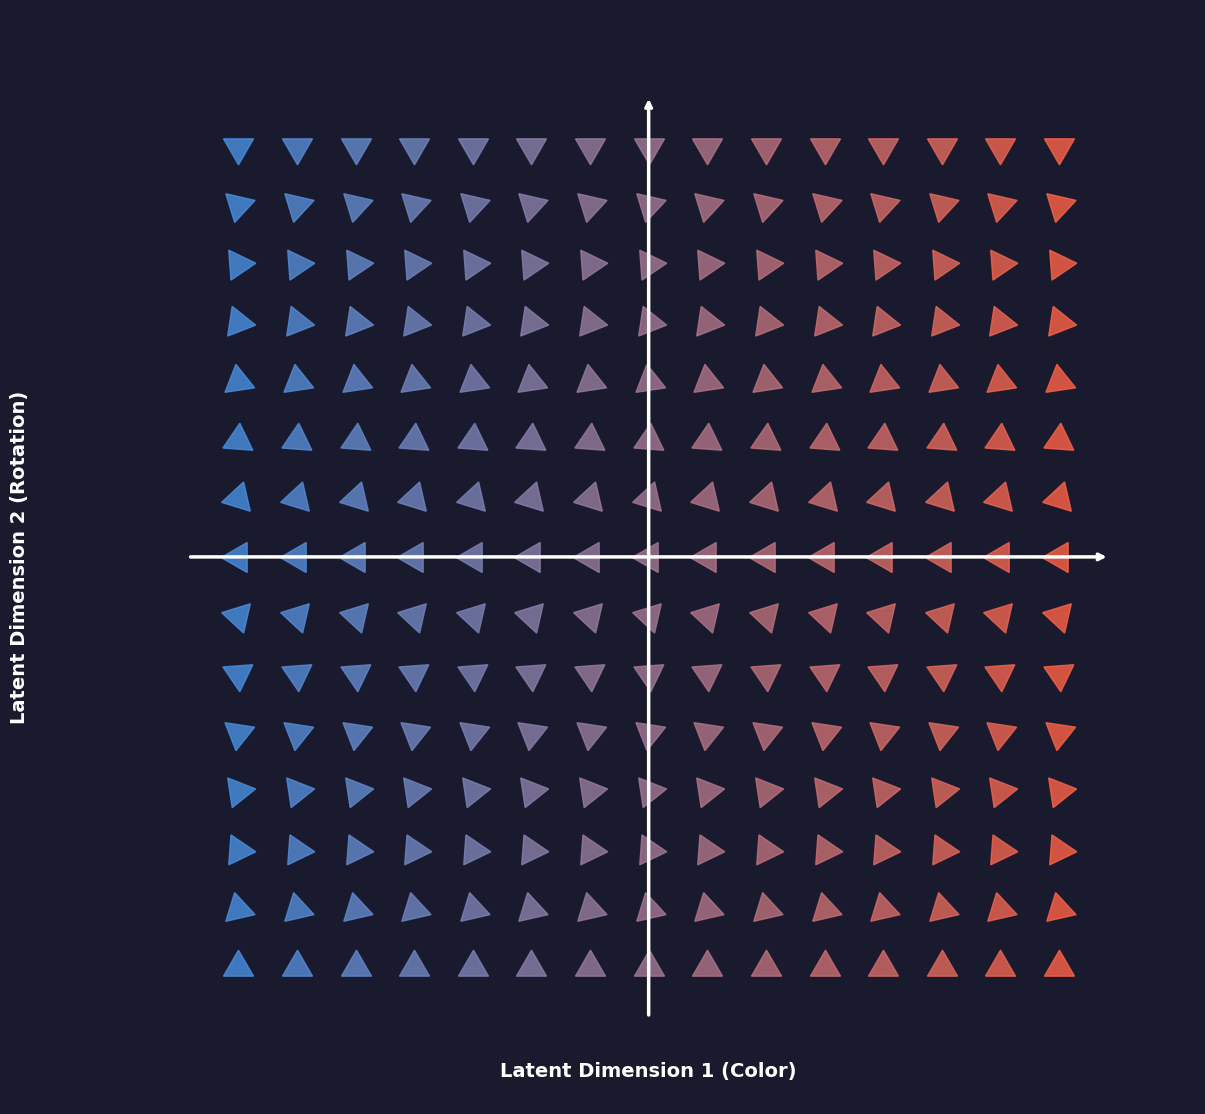

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import FancyArrowPatch

# --- 1. Define the Latent Space and its Mapping to Data ---

# Define the grid for our 2D latent space
latent_dim1_range = np.linspace(-1.5, 1.5, 15)  # Represents 'Color'
latent_dim2_range = np.linspace(-1.5, 1.5, 15)  # Represents 'Rotation'

# Define the colors that correspond to the extremes of the first latent dimension
color_start_hex = '#4A90E2' # Bright Blue
color_end_hex = '#FF6347'   # Tomato Red

# Convert hex colors to RGB for interpolation
color_start_rgb = np.array(mcolors.to_rgb(color_start_hex))
color_end_rgb = np.array(mcolors.to_rgb(color_end_hex))

background_color = '#1A1A2E' # A dark background color

# This function simulates the "decoder" of a generative model.
# It takes a point from the latent space and generates a data output (a colored, rotated marker).
def decode_latent_point(latent_vec):
    """
    Decodes a 2D latent vector into visual properties (color and rotation).
    """
    dim1, dim2 = latent_vec
    
    # Normalize the latent dimensions to a [0, 1] range for interpolation
    # This maps the latent space values to ratios for color and rotation
    color_ratio = (dim1 - latent_dim1_range.min()) / (latent_dim1_range.max() - latent_dim1_range.min())
    rotation_ratio = (dim2 - latent_dim2_range.min()) / (latent_dim2_range.max() - latent_dim2_range.min())
    
    # Interpolate the color based on the first latent dimension
    interpolated_color_rgb = color_start_rgb * (1 - color_ratio) + color_end_rgb * color_ratio
    
    # Map the second latent dimension to a rotation angle (e.g., 0 to 180 degrees)
    rotation_angle = rotation_ratio * 180
    
    return mcolors.to_hex(interpolated_color_rgb), rotation_angle


# --- 2. Plotting the Latent Space ---

plt.style.use('dark_background') 
fig, ax = plt.subplots(figsize=(12, 12))

fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_aspect('equal', adjustable='box') # Ensure axes are scaled equally

# Iterate through each point in our latent space grid
for x in latent_dim1_range:
    for y in latent_dim2_range:
        latent_vector = (x, y)
        
        # "Decode" the latent vector to get the properties of our output shape
        marker_color, marker_angle = decode_latent_point(latent_vector)
        
        # Plot a marker at the latent space location with the decoded properties
        ax.plot(
            x, y, 
            marker=(3, 0, marker_angle), # A triangle marker, where the third value is rotation
            markersize=25, 
            color=marker_color,
            linestyle='None',
            alpha=0.8
        )
        

# --- 3. Add Explanatory Annotations ---

# Add arrows and labels to explain what each latent dimension controls
arrow_props = dict(
    arrowstyle='->',
    linewidth=2.5,
    color='white',
    shrinkA=5,
    shrinkB=5
)

# Arrow for the "Color" dimension (Latent Dimension 1)
ax.annotate(
    "",
    xy=(latent_dim1_range.max() + 0.2, 0), 
    xytext=(latent_dim1_range.min() - 0.2, 0),
    arrowprops=arrow_props
)
ax.text(0, -1.9, 'Latent Dimension 1 (Color)', color='white', ha='center', fontsize=14, weight='bold')

# Arrow for the "Rotation" dimension (Latent Dimension 2)
ax.annotate(
    "",
    xy=(0, latent_dim2_range.max() + 0.2), 
    xytext=(0, latent_dim2_range.min() - 0.2),
    arrowprops=arrow_props
)
ax.text(-2.3, 0, 'Latent Dimension 2 (Rotation)', color='white', va='center', ha='center', rotation=90, fontsize=14, weight='bold')


# --- 4. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---

# Set axis limits to give some padding around the grid
ax.set_xlim(latent_dim1_range.min() - 0.5, latent_dim1_range.max() + 0.5)
ax.set_ylim(latent_dim2_range.min() - 0.5, latent_dim2_range.max() + 0.5)

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False) # Ensure no grid lines are shown

plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show()

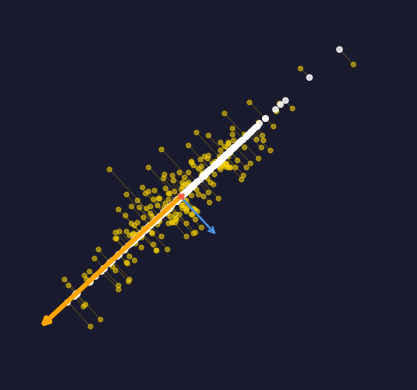

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# --- 1. Generate Synthetic 2D Data ---
np.random.seed(42)  # for reproducibility

# Define the true mean and a covariance matrix that creates a correlated, elliptical data cloud
true_mean = np.array([5, 8])
true_cov = np.array([[3.5, 2.8], 
                   [2.8, 3.0]])

# Generate 2D data points from a multivariate normal distribution
X_data = np.random.multivariate_normal(true_mean, true_cov, 200)

# Define a color palette for the visualization
base_color_hex = '#FFD700' # A vibrant gold/yellow
base_color_rgb = mcolors.to_rgb(base_color_hex)
secondary_color_hex = '#FFA500' # A bright orange
background_color = '#1A1A2E' # A dark background color

# --- 2. Perform Principal Component Analysis (PCA) ---

# Step 1: Calculate the mean of the data
mean_data = np.mean(X_data, axis=0)

# Step 2: Center the data (subtract the mean)
X_centered = X_data - mean_data

# Step 3: Calculate the covariance matrix of the centered data
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 4: Calculate eigenvectors and eigenvalues
# eigh is used for symmetric matrices like the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

# The eigenvectors are our principal components
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]


# --- 3. Plotting the PCA Process and Result ---

plt.style.use('dark_background') 
fig, ax = plt.subplots(figsize=(6, 4))

fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_aspect('equal', adjustable='box') # Ensure axes are scaled equally

# Plot the original scattered data points
ax.scatter(X_data[:, 0], X_data[:, 1], color=base_color_hex, s=10, alpha=0.5, zorder=1)

# Plot the mean of the data
ax.scatter(mean_data[0], mean_data[1], color='#FF6347', s=15, marker='X', zorder=5, label='Data Mean')

# Plot the principal component vectors (eigenvectors)
# The length is scaled by the sqrt of the eigenvalue (which represents the standard deviation)
# This visually shows the variance captured by each component
for i in range(len(eigenvalues)):
    pc = eigenvectors[:, i]
    # Scale factor for visibility
    scale_factor = np.sqrt(eigenvalues[i]) * 3
    
    # Define vector properties
    vector_start = mean_data
    vector_end = mean_data + pc * scale_factor
    
    # Color and width are different for the first and second components
    arrow_color = secondary_color_hex if i == 0 else '#4A90E2'
    arrow_width = 3.5 if i == 0 else 1.5
    
    # Draw arrow from mean to the end of the scaled vector
    ax.annotate(
        '', xy=vector_end, xytext=vector_start,
        arrowprops=dict(
            arrowstyle='->',
            color=arrow_color,
            linewidth=arrow_width,
            shrinkA=0, shrinkB=0
        ),
        zorder=4
    )

# --- Visualize the projection onto the first principal component (PC1) ---

# Project the centered data onto PC1
X_projected_on_pc1 = X_centered.dot(pc1)

# To plot these projected points, we need to map them back into the original 2D space
# We do this by multiplying by the PC1 vector
X_reconstructed = np.outer(X_projected_on_pc1, pc1) + mean_data

# Plot the projected points on the PC1 line
ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='#FFFFFF', s=15, alpha=0.8, zorder=3)

# Draw lines from original data points to their projected counterparts on the PC1 line
for i in range(X_data.shape[0]):
    ax.plot(
        [X_data[i, 0], X_reconstructed[i, 0]],
        [X_data[i, 1], X_reconstructed[i, 1]],
        color=base_color_hex,
        linewidth=0.5,
        alpha=0.3,
        zorder=2
    )


# --- 4. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust x and y limits to ensure all elements are visible
ax.set_xlim(np.min(X_data[:, 0]) - 2, np.max(X_data[:, 0]) + 2)
ax.set_ylim(np.min(X_data[:, 1]) - 2, np.max(X_data[:, 1]) + 2)

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False) # Ensure no grid lines are shown

plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show()

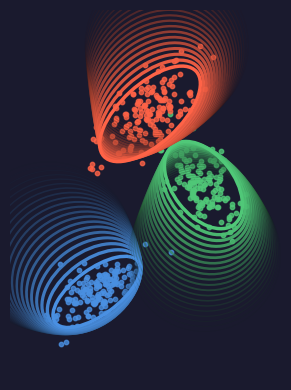

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

# --- 1. Generate Synthetic Gaussian Mixture Data ---
np.random.seed(42)  # for reproducibility

num_components = 3
component_names = ['A', 'B', 'C']

# Define distinct base colors for each component
component_colors_hex = {
    'A': '#4A90E2',  # Bright Blue
    'B': '#50C878',  # Emerald Green
    'C': '#FF6347'   # Tomato Red
}
# Convert hex colors to RGB tuples for easier manipulation
component_colors_rgb = {k: mcolors.to_rgb(v) for k, v in component_colors_hex.items()}

# True parameters (mean and covariance) for each Gaussian component
true_params = {
    'A': {'mean': np.array([2, 3]), 'cov': np.array([[1.5, 0.8], [0.8, 1]])},
    'B': {'mean': np.array([8, 9]), 'cov': np.array([[1.2, -0.6], [-0.6, 1.5]])},
    'C': {'mean': np.array([5, 13]), 'cov': np.array([[2, 1.2], [1.2, 1.8]])}
}

# Lists to store all data points and their component labels
X_data_all = []
component_labels_all = []

# Generate data for each component
for comp in component_names:
    mean = true_params[comp]['mean']
    cov = true_params[comp]['cov']
    
    # Generate 2D data points from a multivariate normal distribution
    x_comp = np.random.multivariate_normal(mean, cov, 150)
    
    X_data_all.append(x_comp)
    component_labels_all.extend([comp] * 150)

# Combine all data points into a single NumPy array
X_data_all = np.concatenate(X_data_all)


# --- 2. Simulate Gaussian Mixture Model Optimization for Each Component ---

all_component_ellipse_data = {} # Dictionary to store optimization ellipses for each component
num_steps = 20     # Number of optimization steps

for comp in component_names:
    true_mean = true_params[comp]['mean']
    true_cov = true_params[comp]['cov']

    # --- Initial parameters (starting far from the true values) ---
    # Initial mean is set away from the true mean
    initial_mean = true_mean + np.random.uniform(-4, 4, 2)
    # Initial covariance is set as a large, near-circular ellipse
    initial_cov = np.eye(2) * np.random.uniform(4, 6)

    # Generate a series of means and covariances converging to the true values
    means = np.linspace(initial_mean, true_mean, num_steps)
    covs = [np.linspace(initial_cov[i, j], true_cov[i, j], num_steps) for i, j in np.ndindex(2,2)]
    
    # Reshape the list of covariances into a list of 2x2 matrices
    covs_reshaped = []
    for i in range(num_steps):
        cov_matrix = np.array([[covs[0][i], covs[1][i]], [covs[2][i], covs[3][i]]])
        covs_reshaped.append(cov_matrix)

    # Store the generated means and covariances for the current component
    ellipse_data_comp = []
    for i in range(num_steps):
        ellipse_data_comp.append({'mean': means[i], 'cov': covs_reshaped[i]})
        
    all_component_ellipse_data[comp] = ellipse_data_comp

# Function to plot an ellipse based on mean and covariance
def plot_ellipse(ax, mean, cov, color, alpha=1.0, lw=2, zorder=1):
    """Plots a 2-std-dev ellipse for a given Gaussian component."""
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi
    
    # Ellipse size is based on 2 standard deviations
    ell = Ellipse(mean, 2 * np.sqrt(v[0]) * 2, 2 * np.sqrt(v[1]) * 2,
                  angle=angle, edgecolor=color, facecolor='none',
                  linewidth=lw, alpha=alpha, zorder=zorder)
    ax.add_patch(ell)


# --- 3. Plotting the Gaussian Mixture Model Optimization Process ---

plt.style.use('dark_background') # Use a dark theme for the plot
fig, ax = plt.subplots(figsize=(6, 4))

background_color = '#1A1A2E' # A dark background color
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the original scattered data points, colored based on their component
for comp in component_names:
    # Filter data points for the current component
    comp_X = np.array([X_data_all[i] for i, label in enumerate(component_labels_all) if label == comp])
    ax.scatter(comp_X[:, 0], comp_X[:, 1], color=component_colors_hex[comp], s=10, alpha=0.8, label=f'Component {comp}', zorder=0)

# Plot the iterative ellipses for each component
for comp in component_names:
    ellipse_data_comp = all_component_ellipse_data[comp]
    total_ellipses = len(ellipse_data_comp)
    base_color_rgb = component_colors_rgb[comp]
    
    # Define a darker version of the base color for the start of the gradient
    dark_start_color_rgb = tuple(c * 0.2 for c in base_color_rgb) 

    # Plot the iterative ellipses
    for i, ellipse_info in enumerate(ellipse_data_comp):
        current_mean = ellipse_info['mean']
        current_cov = ellipse_info['cov']

        # Calculate ratio for smooth color, alpha, and linewidth gradients
        ratio = i / (total_ellipses - 1) if total_ellipses > 1 else 1

        # Interpolate the ellipse color from the dark_start_color_rgb to the component's base_color_rgb
        current_ellipse_color_rgb = tuple(
            dark_start_color_rgb[j] * (1 - ratio) + base_color_rgb[j] * ratio 
            for j in range(3)
        )
        current_ellipse_color_hex = mcolors.to_hex(current_ellipse_color_rgb)

        # Ellipse properties: further ellipses are more transparent and thinner
        alpha = 0.1 + (ratio * 0.9)
        lw = 0.5 + (ratio * 2.0)
        
        plot_ellipse(ax, current_mean, current_cov, current_ellipse_color_hex, alpha=alpha, lw=lw, zorder=1)

    # Plot the final, "optimized" (true) ellipse prominently for each component
    true_mean = true_params[comp]['mean']
    true_cov = true_params[comp]['cov']
    plot_ellipse(ax, true_mean, true_cov, component_colors_hex[comp], lw=.5, zorder=2)


# --- 4. Customize the Plot (No Grid, No Axis, No Legend, No Title) ---
# Adjust x and y limits to ensure all ellipses and data points are visible
ax.set_xlim(np.min(X_data_all[:, 0]) - 2, np.max(X_data_all[:, 0]) + 2)
ax.set_ylim(np.min(X_data_all[:, 1]) - 2, np.max(X_data_all[:, 1]) + 2)
ax.set_aspect('equal', adjustable='box')

# Remove all axis ticks, labels, and spines for a clean, minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False) # Ensure no grid lines are shown

plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show()

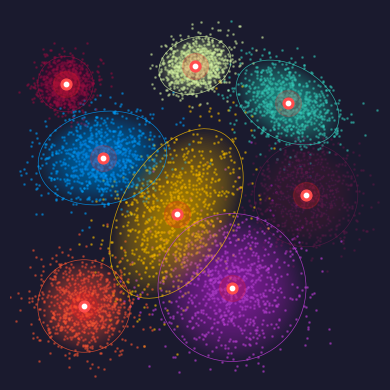

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.colors as mcolors

# --- 1. Setup the Plotting Environment ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

# Use a specific dark blue for the background
background_color = '#1A1A2E'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.set_aspect('equal', adjustable='box') # Ensure circles are not distorted


# --- 2. Generate and Plot Background Elements ---




# --- 3. Define Cluster Properties and Helper Functions ---

def plot_gradient_ellipse(ax, mean, width, height, angle, color, zorder):
    """
    Plots an ellipse with a radial alpha gradient by layering multiple
    concentric ellipses with increasing alpha.
    """
    # Number of layers to simulate the gradient. More steps = smoother gradient.
    num_steps = 50
    
    # Layer concentric ellipses from largest (most transparent) to smallest (most opaque)
    for i in range(num_steps, 0, -1):
        scale = i / num_steps
        
        # The alpha of each layer is very low, but they stack up to create the gradient
        alpha = 0.025
        
        ell = Ellipse(
            xy=mean,
            width=width * scale,
            height=height * scale,
            angle=angle,
            facecolor=color,
            alpha=alpha,
            edgecolor='none', # No edge on the gradient layers
            zorder=zorder
        )
        ax.add_patch(ell)

    # Add a final, sharp border on top to define the cluster's edge
    border_ell = Ellipse(
        xy=mean,
        width=width,
        height=height,
        angle=angle,
        facecolor='none', # No fill color for the border
        edgecolor=color,
        linewidth=.5,
        alpha=0.8, # A more solid alpha for the border
        zorder=zorder + 1 # Ensure border is on top of the fill
    )
    ax.add_patch(border_ell)


# Define a list of distinct, vibrant colors for the clusters
cluster_colors = [
    '#00A1FF',  # Bright Blue
    '#C740E2',  # Magenta
    '#34D1BF',  # Teal
    '#FFC300',  # Bright Yellow
    '#FF5733',  # Orange-Red
    '#581845',  # Deep Purple
    '#DAF7A6',  # Light Green
    '#900C3F'   # Crimson
]

# Manually define cluster parameters: [mean_x, mean_y], width, height, angle
cluster_definitions = [
    ([25, 60], 35, 25, 10),
    ([60, 25], 40, 40, 0),
    ([75, 75], 30, 20, -30),
    ([45, 45], 50, 30, 60),
    ([20, 20], 25, 25, 0),
    ([80, 50], 28, 28, 0),
    ([50, 85], 20, 15, 20),
    ([15, 80], 15, 15, 0),
]

np.random.seed(42)

# --- 4. Plot Each Cluster with a Unique Color and Gradient ---

for i, (mean, width, height, angle) in enumerate(cluster_definitions):
    color = cluster_colors[i % len(cluster_colors)]
    
    # --- a) Generate Data Points for the Cluster ---
    angle_rad = np.deg2rad(angle)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)
    rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    
    std_dev_x = width / 4.0
    std_dev_y = height / 4.0
    unrotated_cov = np.array([[std_dev_x**2, 0], [0, std_dev_y**2]])
    covariance = rotation_matrix @ unrotated_cov @ rotation_matrix.T
    
    num_points_in_cluster = 800
    cluster_data = np.random.multivariate_normal(mean, covariance, num_points_in_cluster)
    
    # --- b) Plot the Cluster Components ---
    
    # Plot the scattered data points
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=1, color=color, alpha=0.4, zorder=1)
    
    # Plot the gradient ellipse
    plot_gradient_ellipse(ax, mean, width, height, angle, color, zorder=2)
    
    # Plot the glowing core data point (on top of everything)
    ax.scatter(mean[0], mean[1], s=350, color='#FF1F1F', alpha=0.2, zorder=4) # Outer glow
    ax.scatter(mean[0], mean[1], s=60, color='#FF4D4D', zorder=5)              # Inner bright core
    ax.scatter(mean[0], mean[1], s=10, color='white', zorder=6)               # Smallest white center


# --- 5. Customize and Finalize the Plot ---

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

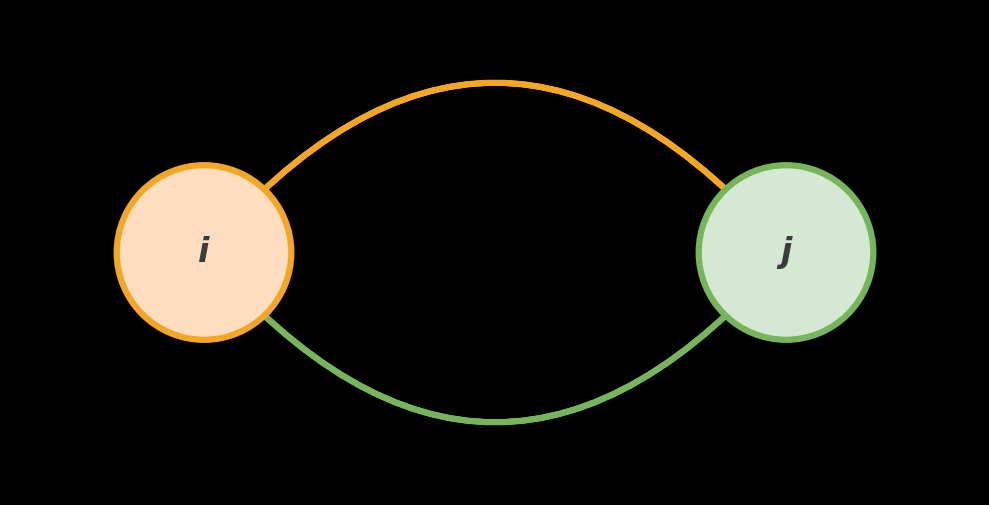

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

# --- 1. Setup the Plot ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#000000')
ax.set_facecolor('#000000')

# --- 2. Define Node Positions and Styles ---
pos = {'i': np.array([-0.6, 0]), 'j': np.array([0.6, 0])}
node_styles = {
    'i': {'face_color': '#FFDDC1', 'edge_color': '#F5A623'},
    'j': {'face_color': '#D5E8D4', 'edge_color': '#77B55A'}
}
node_size = 0.18
line_width = 4.5

# --- 3. Draw the Gradient, Curved Links ---
# Define the start and end points
start_pos, end_pos = pos['i'], pos['j']

# Define the control points for the Bezier curves
control_top = (start_pos + end_pos) / 2 + np.array([0, 0.7])
control_bottom = (start_pos + end_pos) / 2 - np.array([0, 0.7])

# Create the path data for the top and bottom arcs
verts_top = [start_pos, control_top, end_pos]
codes_top = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
path_top = Path(verts_top, codes_top)

verts_bottom = [start_pos, control_bottom, end_pos]
codes_bottom = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
path_bottom = Path(verts_bottom, codes_bottom)

# Function to draw a gradient path
def draw_gradient_path(ax, path, edgecolor, num_steps=20):
    for i in range(num_steps, 0, -1):
        alpha = i / num_steps
        ax.add_patch(
            patches.PathPatch(
                path,
                facecolor='none',
                lw=line_width * (i / num_steps),
                edgecolor=edgecolor,
                alpha=alpha,
            )
        )

# Draw the top and bottom arcs with gradient
draw_gradient_path(ax, path_top, node_styles['i']['edge_color'])
draw_gradient_path(ax, path_bottom, node_styles['j']['edge_color'])

# --- 4. Draw the SOLID Nodes ---
for node, position in pos.items():
    style = node_styles[node]

    # Draw the main node circle
    ax.add_patch(
        plt.Circle(
            position,
            radius=node_size,
            facecolor=style['face_color'],
            edgecolor=style['edge_color'],
            linewidth=line_width,
            zorder=3,
        )
    )

    # Add the label inside the node
    ax.text(
        position[0],
        position[1],
        node,
        ha='center',
        va='center',
        fontsize=24,
        fontweight='bold',
        fontstyle='italic',
        color='#3C3C3C',
        zorder=4,
    )

# --- 5. Finalize the Plot ---
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-0.5, 0.5)
ax.set_aspect('equal', adjustable='box')
plt.axis('off')
plt.tight_layout()
plt.show()
